# The Effect of Tone and Content Type on Brand Social Media Interactions 


In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import warnings
from nltk.sentiment import SentimentIntensityAnalyzer
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings("ignore")


sns.set_palette('Purples_r')

# load the data
twitter = pd.read_csv(r'...\Twitter.csv', parse_dates=[0])

pd.options.display.max_columns = None
# view the data
twitter.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,2023-07-13 10:57:00,1679429829567946759,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429...,Your money should not be a gamble. Before you ...,https://twitter.com/StanbicIBTC/status/1679429...,445,445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"345,718",3.6%,NaN,16,4,4,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,9,9,1,0.0,7,1.0,NaN,NaN,0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,2023-07-12 20:03:00,1679204777081864192,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204...,"What skill (s) do you have, that no one ever t...",NaN,"2,961","2,961",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Data Inspection, Cleaning and validation

In [2]:
# view data shape
twitter.shape

(8529, 147)

The data contained 8529 posts and 147 post attributes

In [3]:
# view data info
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Columns: 147 entries, Date to Tags
dtypes: datetime64[ns](1), float64(119), int64(1), object(26)
memory usage: 8.7+ MB


The columns were too much to see their infos, lets check for duplicates first

In [4]:
# check for duplicates
twitter.duplicated().sum()

0

there are no duplicates in the data available data, lets check for missing values

In [5]:
# check for missing values
twitter.isna().sum()

Date                          0
Post ID                       0
Network                       0
Post Type                     0
Content Type                  0
                           ... 
Card Impressions           8529
Card Teaser Impressions    8529
Card Teaser Clicks         8529
Poll Votes                 8529
Tags                       7129
Length: 147, dtype: int64

Seeing the some columns are totally empty, we will drop them. Hence, columns that are 90 percent empty are dropped.

In [6]:
# drop empty columns
empty_perc = twitter.isna().sum()/len(twitter)
empty_perc = empty_perc[empty_perc < 0.9]
twitter_new = twitter[empty_perc.index]
# view the new data shape
twitter_new.shape

(8529, 36)

After dropping the empty columns, we now have 36 columns left.

In [7]:
# view the new data
twitter_new.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Video Views,Media Views,Tags
0,2023-07-13 10:57:00,1679429829567946759,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429...,Your money should not be a gamble. Before you ...,https://twitter.com/StanbicIBTC/status/1679429...,445,445,"345,718",3.6%,16,4,4,2.0,1.0,NaN,NaN,9,9,1,0.0,7,1.0,0,0.0,0.0,0.0,0.0,0.0,NaN,1,CIB Posts
1,2023-07-12 20:03:00,1679204777081864192,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204...,"What skill (s) do you have, that no one ever t...",NaN,"2,961","2,961","347,102",1.76%,52,11,11,20.0,3.0,NaN,NaN,18,18,NaN,1.0,12,5.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2023-07-12 19:00:00,1679189012798660608,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679189...,Sade was able to acquire a home loan and make ...,"https://bit.ly/StanbicIBTCHomeLoans, https://t...",850,850,"347,594",4.24%,36,4,4,1.0,3.0,0.82%,7.0,21,28,11,0.0,10,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,11,Weekly Wealth Posts
3,2023-07-12 18:20:00,1679179017084354560,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679179...,Here are some mistakes you shouldn’t make duri...,https://twitter.com/StanbicIBTC/status/1679179...,"1,499","1,499","349,169",3.4%,51,13,13,3.0,5.0,NaN,NaN,30,30,24,0.0,5,1.0,0,0.0,0.0,0.0,0.0,0.0,NaN,24,NaN
4,2023-07-11 12:50:00,1678733396992745472,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1678733...,Safeguard every aspect of your operations with...,https://twitter.com/StanbicIBTC/status/1678733...,"1,184","1,184","345,653",1.52%,18,7,7,3.0,1.0,NaN,NaN,7,7,3,0.0,1,3.0,0,0.0,0.0,0.0,0.0,0.0,NaN,3,"Insurance Limited Posts, Weekly Wealth Posts"


Now, view the new data informations

In [8]:
twitter_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              8529 non-null   datetime64[ns]
 1   Post ID                           8529 non-null   int64         
 2   Network                           8529 non-null   object        
 3   Post Type                         8529 non-null   object        
 4   Content Type                      8529 non-null   object        
 5   Profile                           8529 non-null   object        
 6   Sent by                           8529 non-null   object        
 7   Link                              8481 non-null   object        
 8   Post                              8529 non-null   object        
 9   Linked Content                    4978 non-null   object        
 10  Impressions                       7842 non-null 

There are data types to be corrected, for example impressions, organic impressions etc. To be able to correct these data types, some special characters like comma (,) and percentage sign (%) need to first be removed.

In [9]:
col_to_clean = ['Impressions','Organic Impressions','Potential Reach','Engagement Rate (per Impression)','Engagements',
               'Reactions','Likes','Shares','Click-Through Rate','Other Post Clicks','Post Clicks (All)',
               'Post Media Clicks','Post Detail Expand Clicks','Other Engagements','Video Views','Media Views']

for col in col_to_clean:
    twitter_new[col] = twitter_new[col].str.replace(',',"")
    twitter_new[col] = twitter_new[col].str.replace('%',"")
    # convert to numeric
    twitter_new[col] = pd.to_numeric(twitter_new[col])

Let's take a look at the datatypes again

In [10]:
twitter_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              8529 non-null   datetime64[ns]
 1   Post ID                           8529 non-null   int64         
 2   Network                           8529 non-null   object        
 3   Post Type                         8529 non-null   object        
 4   Content Type                      8529 non-null   object        
 5   Profile                           8529 non-null   object        
 6   Sent by                           8529 non-null   object        
 7   Link                              8481 non-null   object        
 8   Post                              8529 non-null   object        
 9   Linked Content                    4978 non-null   object        
 10  Impressions                       7842 non-null 

The datatypes seems to be correct now, we can move on to validating the data in the columns. but before that, lets take a look at the desctiptive statistics of our data

In [11]:
twitter_new.describe()

,Post ID,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Video Views,Media Views
count,8.529000e+03,7842.000000,7842.000000,8.449000e+03,7841.000000,7842.000000,7620.000000,7620.000000,7842.000000,3623.000000,3613.000000,3613.000000,7842.000000,7842.000000,6693.000000,5897.000000,7842.000000,7842.000000,7620.000000,7842.000000,7842.0,7842.000000,7842.000000,7842.000000,850.000000,6698.000000
mean,1.209537e+18,3188.676486,3188.676486,2.806459e+05,2.910116,110.073706,20.734908,20.734908,6.244963,13.063483,0.267924,7.002768,69.002168,72.228513,45.097116,1.534000,24.242158,5.116934,3.139108,0.000510,0.0,0.000510,0.028819,0.024356,177.595294,63.247387
std,2.954973e+17,3337.303183,3337.303183,1.053295e+05,2.870294,305.482358,173.643063,173.643063,17.722314,29.885634,0.525716,23.923304,198.227784,201.478524,106.118962,14.064529,105.778891,13.704917,31.027177,0.027658,0.0,0.027658,0.371729,0.165338,226.546456,138.636464
min,3.030516e+17,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,9.706765e+17,1285.000000,1285.000000,2.226310e+05,1.680000,29.000000,5.000000,5.000000,0.000000,4.000000,0.040000,1.000000,15.000000,16.000000,9.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,84.000000,10.000000
50%,1.232560e+18,2440.500000,2440.500000,3.030520e+05,2.390000,57.000000,10.000000,10.000000,2.000000,9.000000,0.100000,2.000000,31.000000,34.000000,20.000000,0.000000,9.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,122.000000,25.000000
75%,1.497255e+18,3801.000000,3801.000000,3.210280e+05,3.400000,109.000000,18.000000,18.000000,6.000000,16.000000,0.300000,6.000000,67.000000,71.000000,44.000000,1.000000,21.000000,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,199.750000,66.000000
max,1.679430e+18,77765.000000,77765.000000,2.194275e+06,112.680000,14972.000000,13528.000000,13528.000000,623.000000,1135.000000,12.670000,699.000000,9083.000000,9124.000000,3698.000000,812.000000,4776.000000,609.000000,1201.000000,2.000000,0.0,2.000000,21.000000,3.000000,3769.000000,3769.000000


Organic impressions and Impressions seems to contains the same values, same for Reactions and Likes, we have to drop one of the duplicate columns, in this instance, organic Impressions and Reactions are dropped. App install attempts seems to contain only zero, the column are also dropped.

In [12]:
twitter_new.drop(['Organic Impressions', 'Reactions', 'Post Media Clicks','App Install Attempts'], axis='columns', inplace=True)

In [13]:
# view random sample of the data
twitter_new.sample(n=5)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Opens,Follows from Post,Unfollows from Post,Video Views,Media Views,Tags
8011,2016-10-20 11:16:00,789047587995324416,Twitter,Tweet,Text,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/7890475...,We have to provide more employment opportuniti...,NaN,1069.0,159596.0,1.03,11.0,2.0,1.0,8.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6101,2018-07-06 10:36:00,1015167532997718016,Twitter,Tweet,Photo,'@StanbicIBTC,,https://twitter.com/StanbicIBTC/status/1015167...,Did you just move into a new house? We can hel...,NaN,NaN,220254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,2023-06-07 11:55:00,1666398483627102210,Twitter,Tweet,Photo,'@StanbicIBTC,Kemi Amoo,https://twitter.com/StanbicIBTC/status/1666398...,"With the Stanbic IBTC Pension calculator, you ...","https://bit.ly/StanbicIBTCPensionCalculator, h...",1976.0,345331.0,4.71,93.0,11.0,9.0,NaN,0.56,11.0,60.0,71.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,NaN,46.0,Weekly Wealth Posts
4794,2019-09-06 10:00:00,1169898050170437632,Twitter,Tweet,Photo,'@StanbicIBTC,Aramide Salami,https://twitter.com/StanbicIBTC/status/1169898...,It’s going to be lit 🔥\nWatch this space for m...,NaN,5075.0,294832.0,4.06,206.0,34.0,6.0,23.0,0.04,2.0,141.0,143.0,NaN,16.0,6.0,0.0,0.0,0.0,0.0,0.0,NaN,119.0,NaN
3259,2020-09-29 17:00:00,1310972675700011008,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1310972...,More ways for you to give their dreams wings! ...,"http://www.stanbicibtcbank.com, https://twitte...",2847.0,305129.0,1.09,31.0,12.0,1.0,NaN,0.07,2.0,12.0,14.0,NaN,5.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0,NaN


from the sample, we can see that things like emoji and extra spaces needs to removed. We will get back to that, first, lets check if the dates are valid

In [14]:
print(twitter_new['Date'].min(), '\n', twitter_new['Date'].max())

2013-02-17 09:01:00 
 2023-07-13 10:57:00


The Date column is valid as no date is earlier than january 2013 and no date is later tham july 2023. The Network, Post Type and Profile should contain one value each, let validate and see.

In [15]:
twitter_new['Network'].nunique()

1

In [16]:
twitter_new['Post Type'].nunique()

1

In [17]:
twitter_new['Profile'].nunique()

1

Nice!! The columns are valid, however, they do not add more meaning to the data so they will be dropped

In [18]:
twitter_new = twitter_new.drop(['Network', 'Post Type', 'Profile'], axis = 'columns')

Now that the columns has been dropped, let's validate the Content Type

In [19]:
twitter_new['Content Type'].unique()

array(['Photo', 'Text', 'Video', 'Link'], dtype=object)

Four! 4 unique content type were found, there is no need for further cleaning as they are all in capitalized case. We can now move on to validating the Sent by column.

In [20]:
twitter_new['Sent by'].unique()

array(['Sophia Amuka', 'Blessing Ubah', 'Kemi Amoo', 'Damilare Oyekanmi',
       ' ', 'Lilian Ibekwe', 'Rebecca Oyebode', 'Aramide Salami',
       'Kanayo Obiano', 'Philip Nwagwunor', 'Dunni Ogunsanya',
       'Patience Nnaji'], dtype=object)

There are some missing names of sender indicated by empty strings, these are replaced with 'Unknown'

In [21]:
twitter_new['Sent by'] = twitter_new['Sent by'].str.replace('^\s', 'Unknown')
twitter_new['Sent by'].unique()

array(['Sophia Amuka', 'Blessing Ubah', 'Kemi Amoo', 'Damilare Oyekanmi',
       'Unknown', 'Lilian Ibekwe', 'Rebecca Oyebode', 'Aramide Salami',
       'Kanayo Obiano', 'Philip Nwagwunor', 'Dunni Ogunsanya',
       'Patience Nnaji'], dtype=object)

some post links are missing, after investigating, it is found that the link is made up of the base url "https://twitter.com/StanbicIBTC/status/" and the post id, this strategy is used in rectifying the misssing links.

In [22]:
twitter_new.head()

,Date,Post ID,Content Type,Sent by,Link,Post,Linked Content,Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Opens,Follows from Post,Unfollows from Post,Video Views,Media Views,Tags
0,2023-07-13 10:57:00,1679429829567946759,Photo,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429...,Your money should not be a gamble. Before you ...,https://twitter.com/StanbicIBTC/status/1679429...,445.0,345718.0,3.60,16.0,4.0,2.0,NaN,NaN,NaN,9.0,9.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,CIB Posts
1,2023-07-12 20:03:00,1679204777081864192,Text,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204...,"What skill (s) do you have, that no one ever t...",NaN,2961.0,347102.0,1.76,52.0,11.0,20.0,NaN,NaN,NaN,18.0,18.0,1.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2023-07-12 19:00:00,1679189012798660608,Photo,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679189...,Sade was able to acquire a home loan and make ...,"https://bit.ly/StanbicIBTCHomeLoans, https://t...",850.0,347594.0,4.24,36.0,4.0,1.0,NaN,0.82,7.0,21.0,28.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11.0,Weekly Wealth Posts
3,2023-07-12 18:20:00,1679179017084354560,Photo,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679179...,Here are some mistakes you shouldn’t make duri...,https://twitter.com/StanbicIBTC/status/1679179...,1499.0,349169.0,3.40,51.0,13.0,3.0,NaN,NaN,NaN,30.0,30.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,24.0,NaN
4,2023-07-11 12:50:00,1678733396992745472,Photo,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1678733...,Safeguard every aspect of your operations with...,https://twitter.com/StanbicIBTC/status/1678733...,1184.0,345653.0,1.52,18.0,7.0,3.0,NaN,NaN,NaN,7.0,7.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,"Insurance Limited Posts, Weekly Wealth Posts"


In [23]:
missing_links = twitter_new[twitter_new['Link'].isna()].index

for i in missing_links:
    post_id = twitter_new['Post ID'][i]
    url = "https://twitter.com/StanbicIBTC/status/"
    twitter_new.iloc[i,6] = url + str(post_id)
    
twitter_new['Link'].isna().sum()

48

Now that there are no more missing values in the link column, lets remove the emojis, extra spaces in the post column and convert it to a lower caps.

In [24]:
twitter_new['Post'] = twitter_new['Post'].str.lower()
twitter_new['Post'] = twitter_new['Post'].str.replace('\n','')
twitter_new['Post'] = twitter_new['Post'].str.strip()

### Remove  Emoji and view the data

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

twitter_new['Post'].apply(remove_emojis)


twitter_new['Post'].head(10)

0    your money should not be a gamble. before you ...
1    what skill (s) do you have, that no one ever t...
2    sade was able to acquire a home loan and make ...
3    here are some mistakes you shouldn’t make duri...
4    safeguard every aspect of your operations with...
5    tell us in the comments.#itcanbe https://t.co/...
6    together, we can make a difference and build a...
7    hey ceos, it’s time to say goodbye to complexi...
8    with the stanbic ibtc sme online-bento redirec...
9    let us work together to help you reach the rem...
Name: Post, dtype: object

Emojis and extra spaces have been removed, lets create some features that would be helpful in achieving the goals of this projects.

- Contains Question -> if a post/caption contains questions
- Mention Someone -> if an account was mentioned in a post/caption
- Contains hashtag -> if a post/caption contains hashtags
- Linked to other content -> if the post/caption contains link to other content type
- Post length -> if the length of a post/caption
- Contains action words -> if a post/caption contains action words such as like, comment, share, follow, click
- Tone -> the tone of the post.

In [25]:
twitter_new['Contains Question'] = np.where(twitter_new['Post'].str.contains('\?'),"Yes","No")
twitter_new['Mention Someone'] = np.where(twitter_new['Post'].str.contains('@'),"Yes","No")
twitter_new['Contains Hashtags'] = np.where(twitter_new['Post'].str.contains('#'),"Yes","No")
twitter_new['Linked to other content'] = np.where(twitter_new['Linked Content'].str.len() > 5,"Yes","No")
twitter_new['Post length'] = np.where(twitter_new['Post'].str.len() <= 100, "Short",
                                     np.where(twitter_new['Post'].str.len() <= 250, "Medium", "Long"))
twitter_new['Contains Action Words'] = np.where(twitter_new['Post'].str.contains('like') |
                                               twitter_new['Post'].str.contains('comment')|
                                               twitter_new['Post'].str.contains('share') |
                                               twitter_new['Post'].str.contains('follow') |
                                               twitter_new['Post'].str.contains('click'), "Yes", "No")

sent = []

# create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# analyze the sentiment of a sentence
for post in twitter_new['Post']:
    sentiment = sia.polarity_scores(post)
    if sentiment['compound'] > 0.5:
        sent.append('Positive')
    elif sentiment['compound'] < - 0.5:
        sent.append('Negative')
    else:
        sent.append('Neutral')
        
twitter_new['Tone'] = sent


Features have been created, fill the missing values in the tag column with "No tags" indicating there is no tag for the post made

In [26]:
twitter_new['Tags'] = twitter_new['Tags'].fillna('No Tags')
twitter_new['Tags'].nunique()

103

Lets take a look visually at the distribution of our numerical data

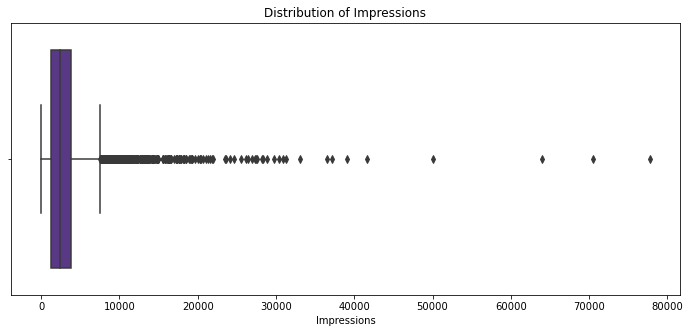

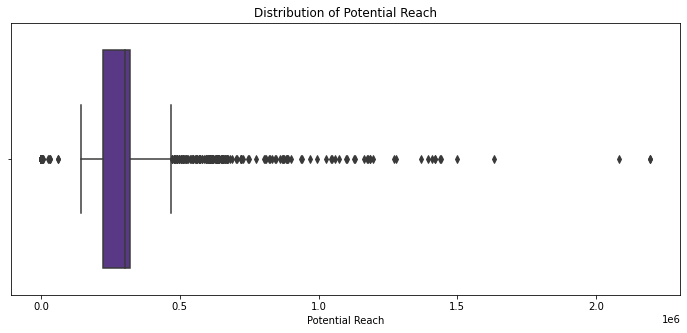

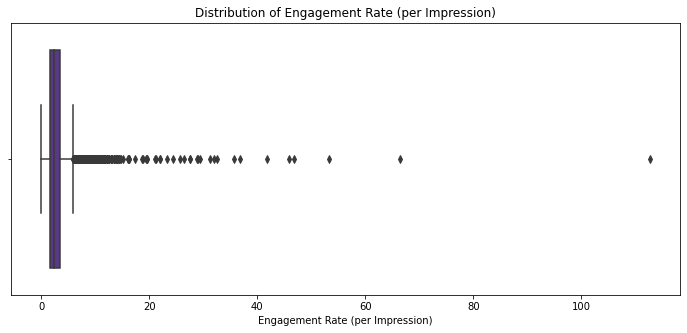

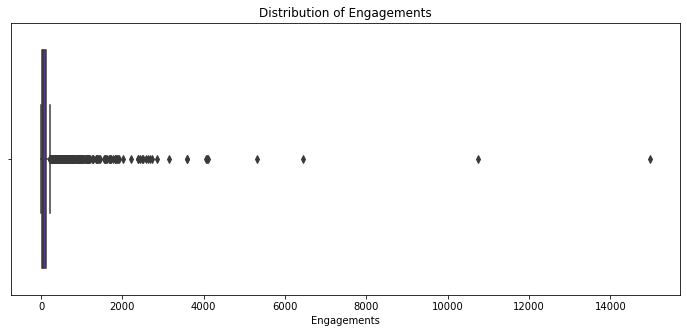

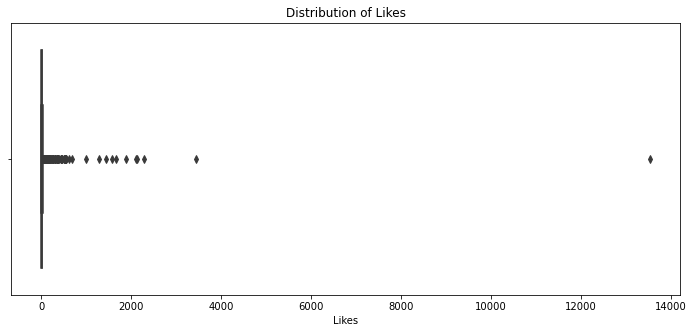

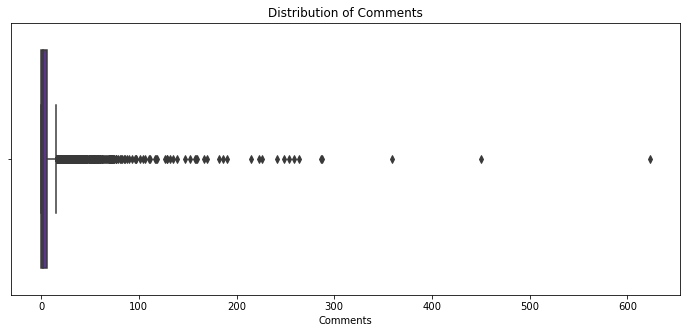

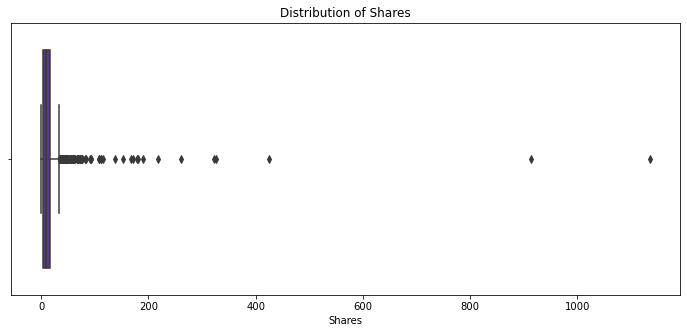

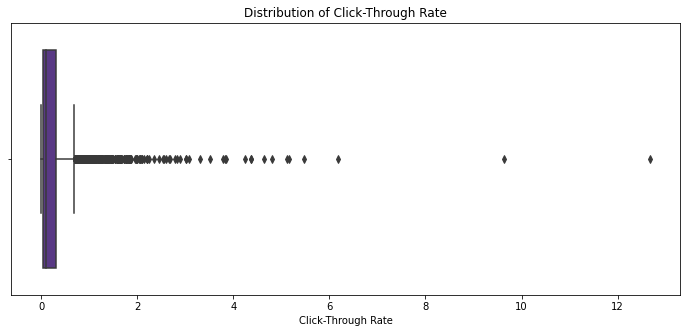

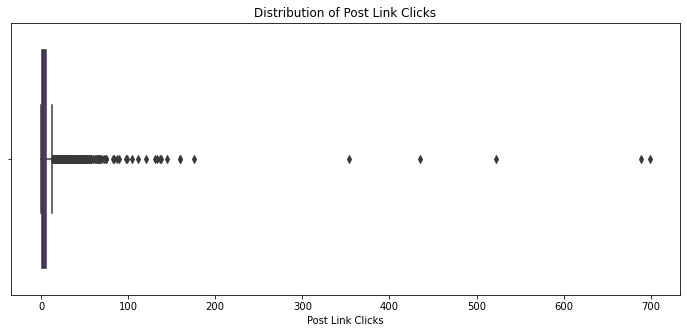

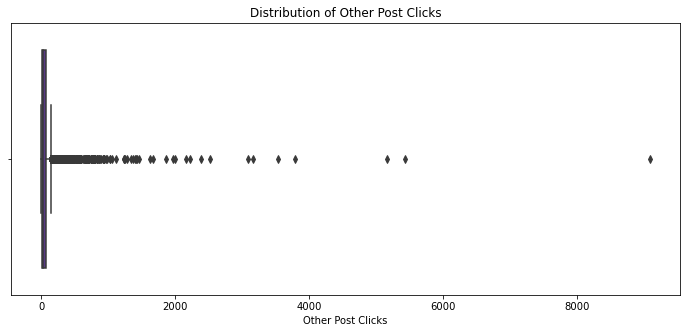

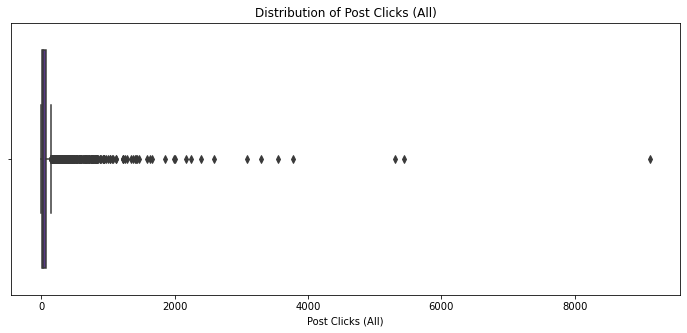

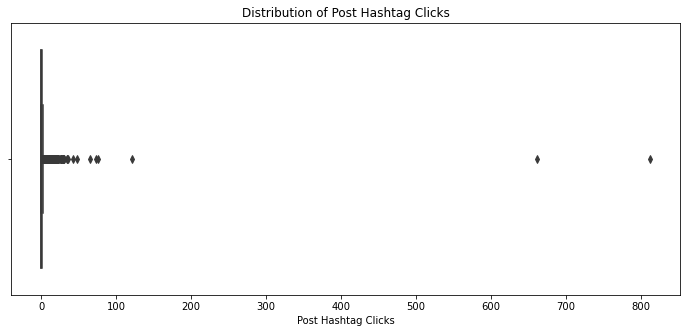

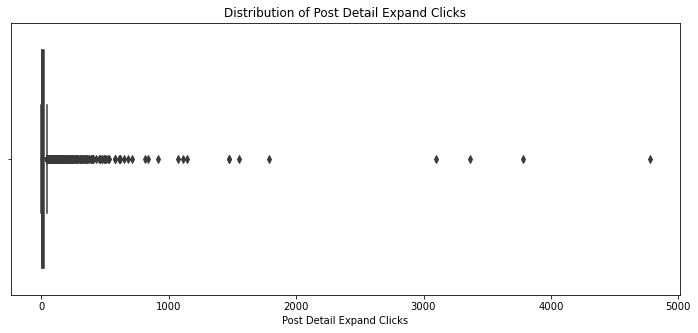

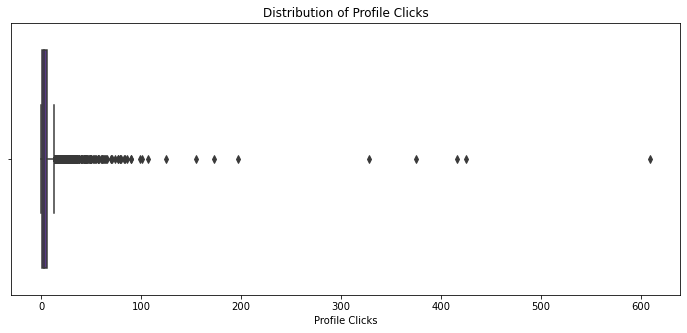

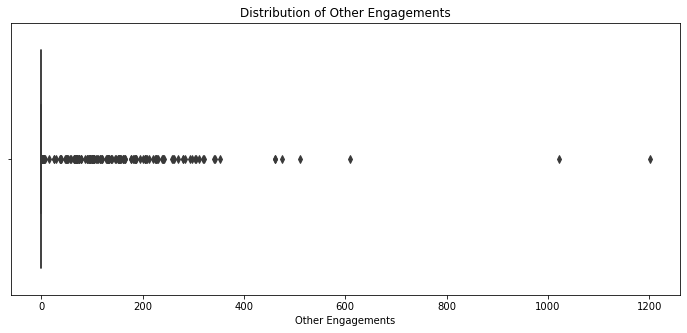

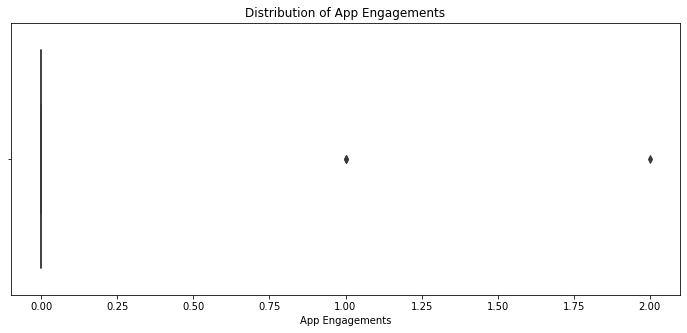

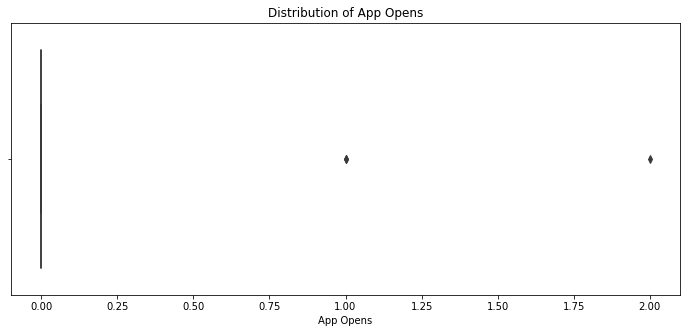

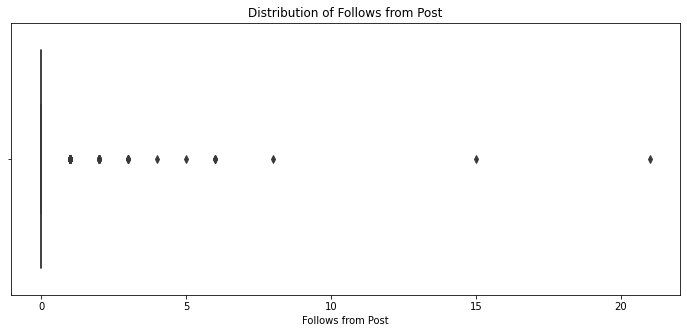

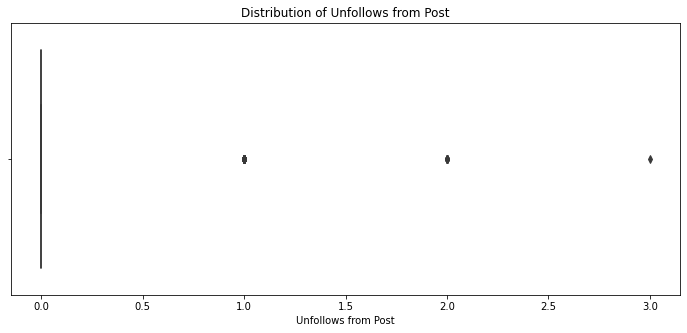

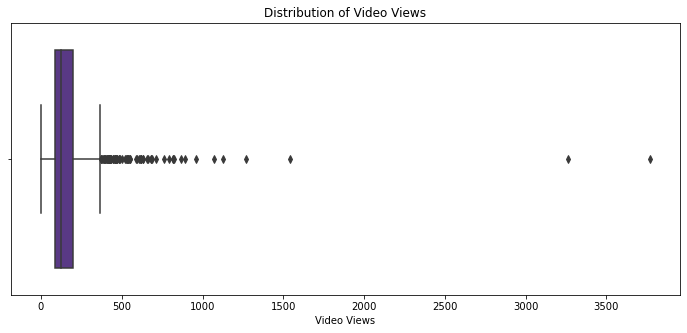

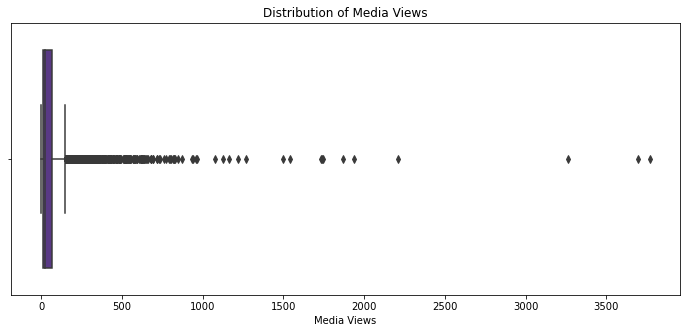

In [27]:

for col in twitter_new.columns:
    if twitter_new[col].dtype == int or twitter_new[col].dtype == float:
        plt.figure(figsize=(12,5))
        sns.boxplot(data=twitter_new, x = col)
        plt.title(f'Distribution of {col}')
        plt.show()

We see our data contains so many outliers, before doing anything, let's first treat the missing values in the columns.

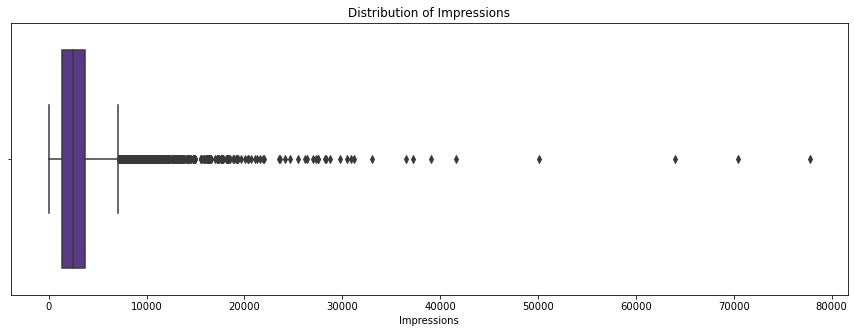

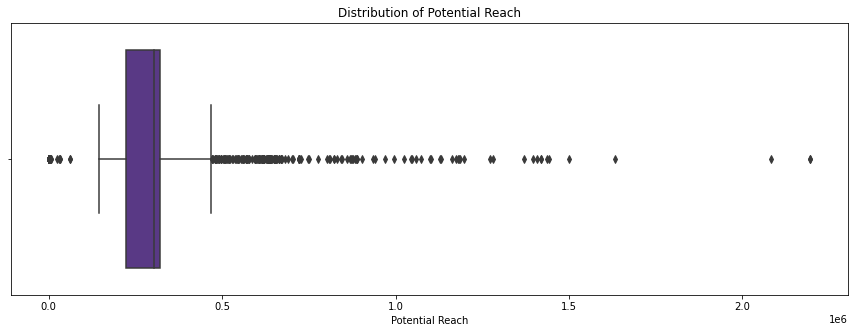

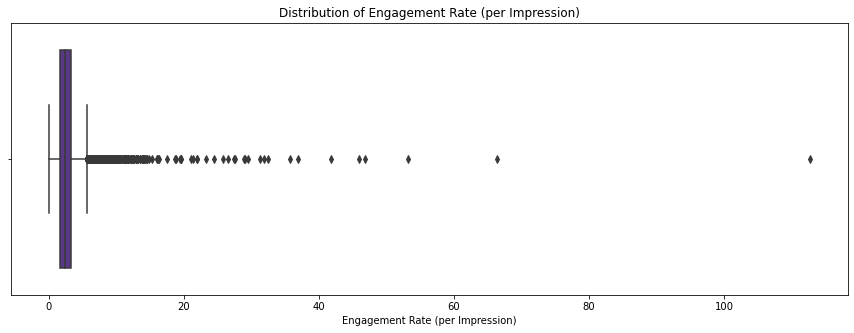

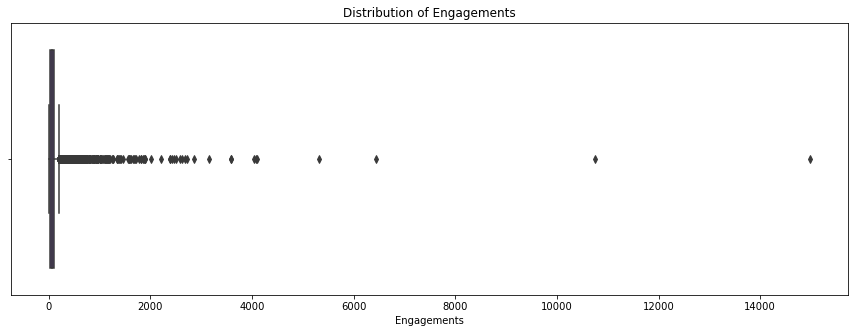

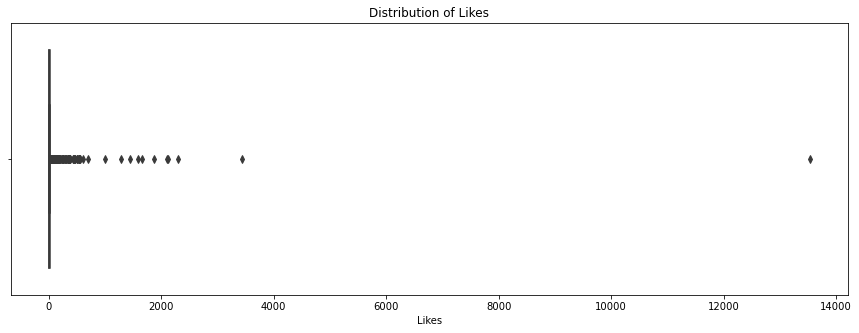

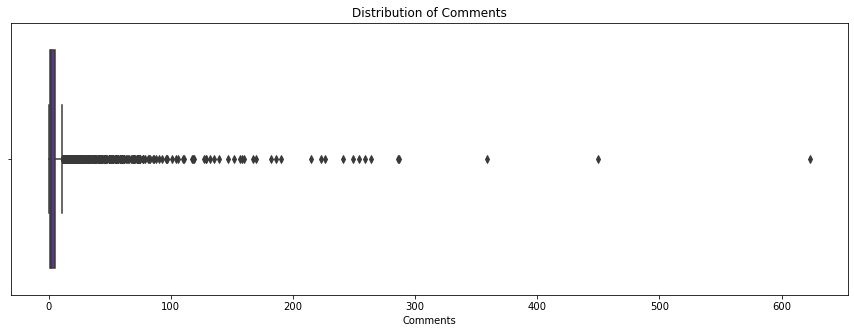

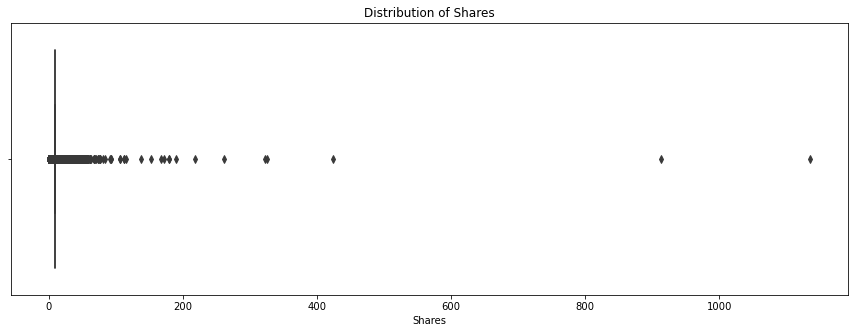

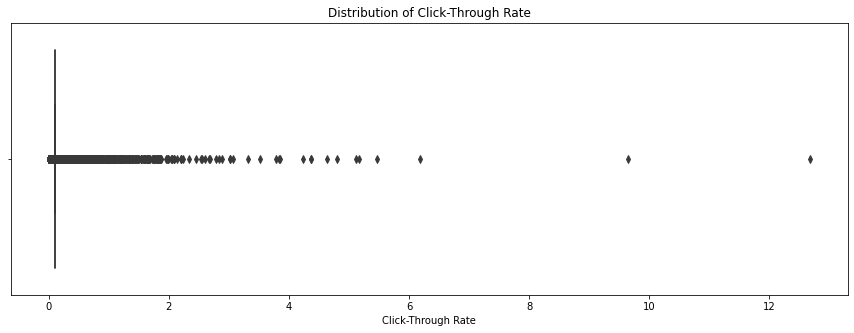

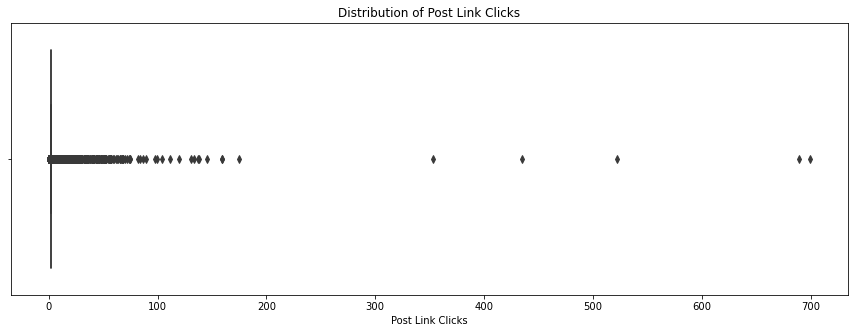

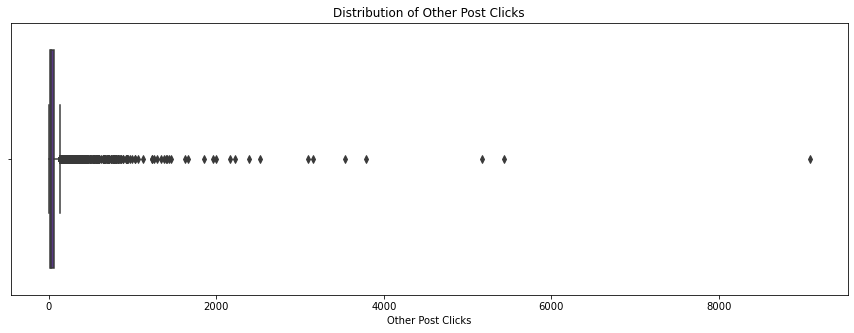

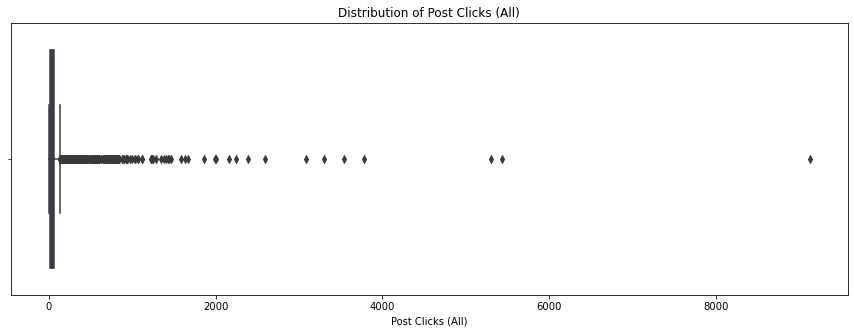

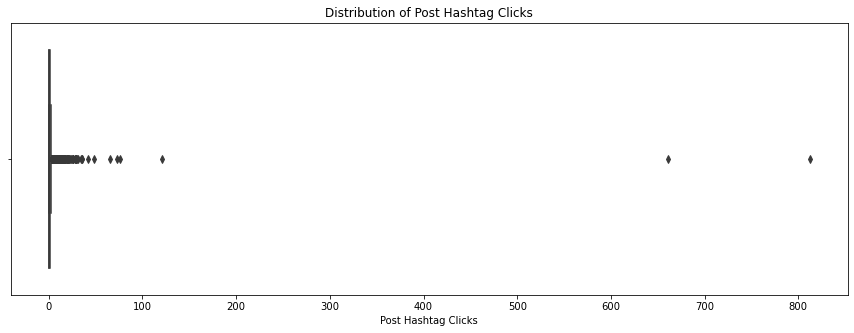

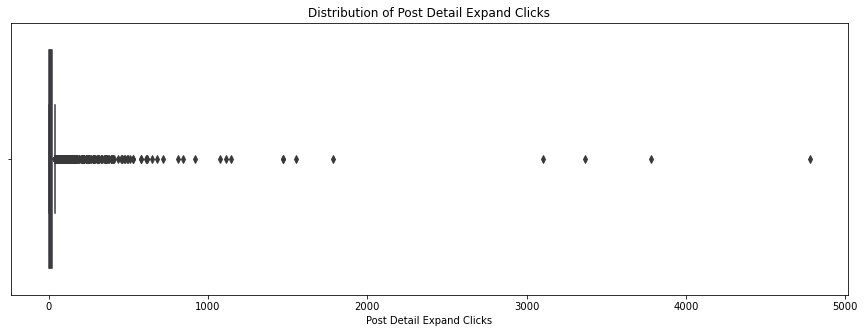

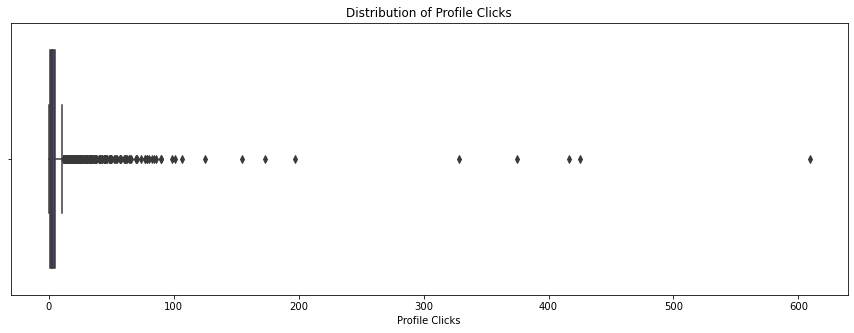

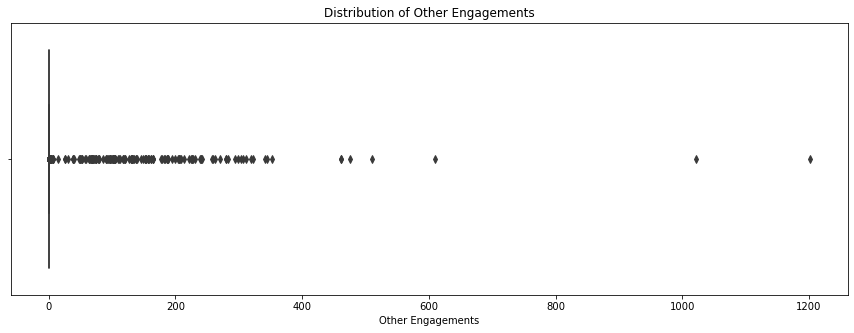

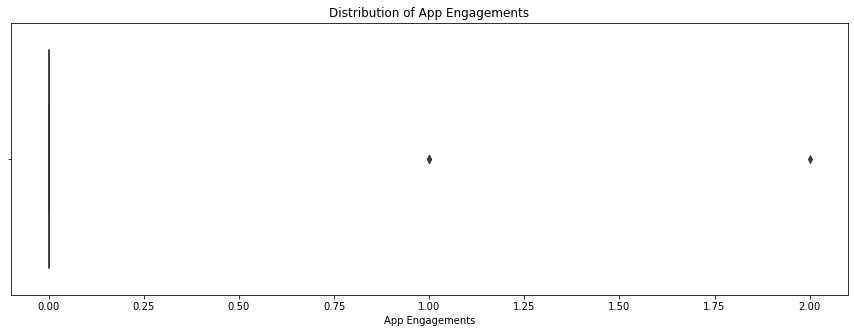

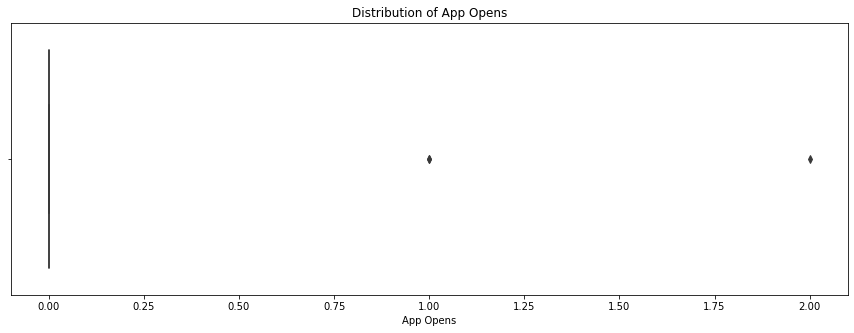

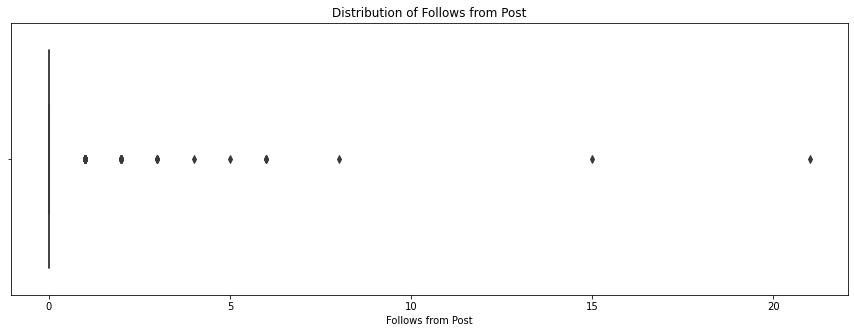

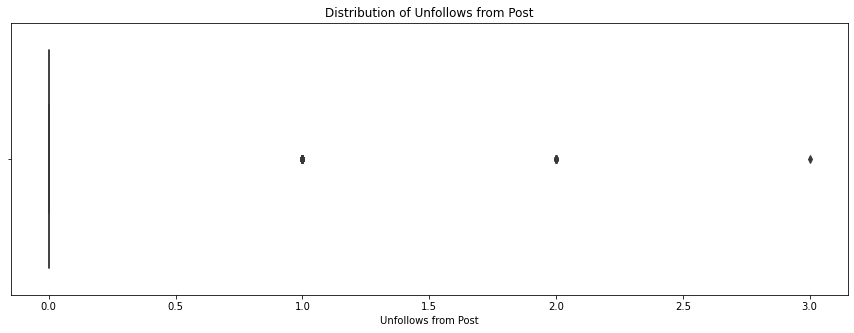

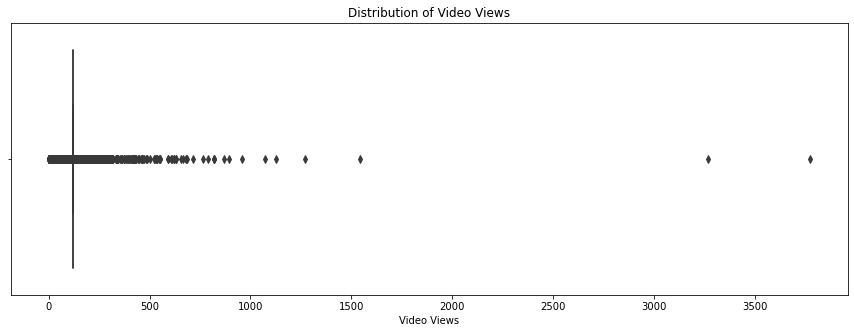

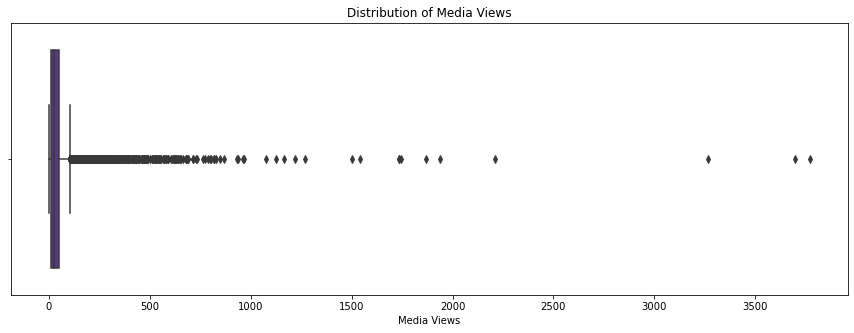

In [28]:
# Impute missing values
for col in twitter_new.columns:
    if twitter_new[col].dtype == int or twitter_new[col].dtype == float:
        twitter_new[col] = twitter_new[col].fillna(twitter_new[col].median())
        plt.figure(figsize=(15,5))
        sns.boxplot(x=twitter_new[col])
        plt.title(f'Distribution of {col}')
        plt.show()

Missing values in the columns were imputed with the median value as they are more robust to outliers. Winsorizing method will also be used in imputing the outliers to further clean our data. some columns (CTR, App opens, Post Link Clicks, Other Engagements, App Engagements, App Install Attempts, Follows from Post, Unfollows from Post) were omitted as treating the outliers in such columns could introduce bias into the analysis as all of the values will be set to one figure. The Shares column is also Omitted while treating the outlier because we will be using it to predict post that are likely to go viral (i.e prediction of outliers).

Total Outliers in Impressions: 0
Percentage of outliers in Impressions: 0.0 %


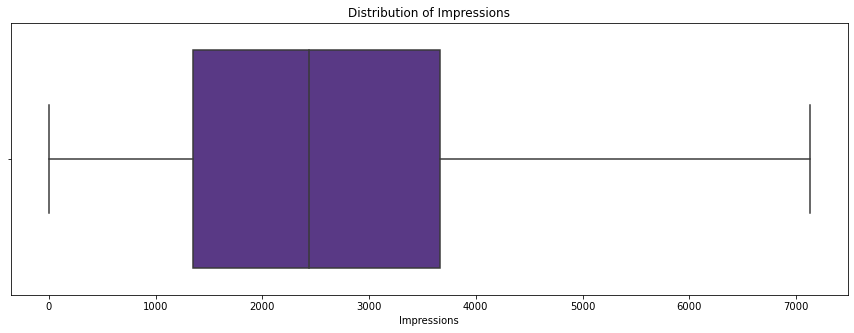

Total Outliers in Potential Reach: 0
Percentage of outliers in Potential Reach: 0.0 %


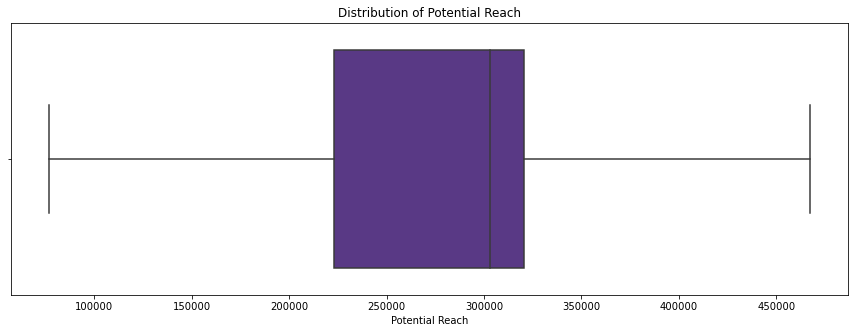

Total Outliers in Engagement Rate (per Impression): 0
Percentage of outliers in Engagement Rate (per Impression): 0.0 %


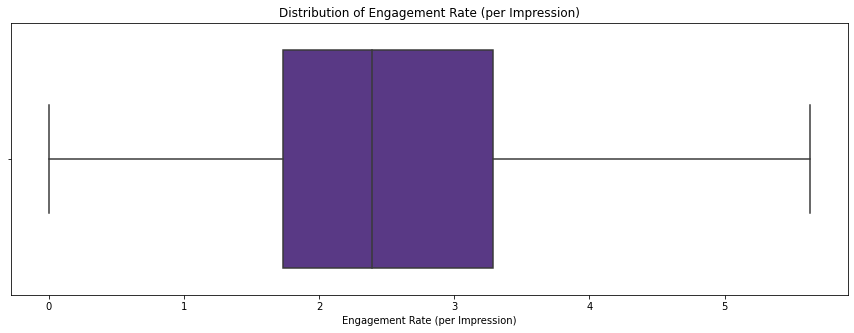

Total Outliers in Engagements: 0
Percentage of outliers in Engagements: 0.0 %


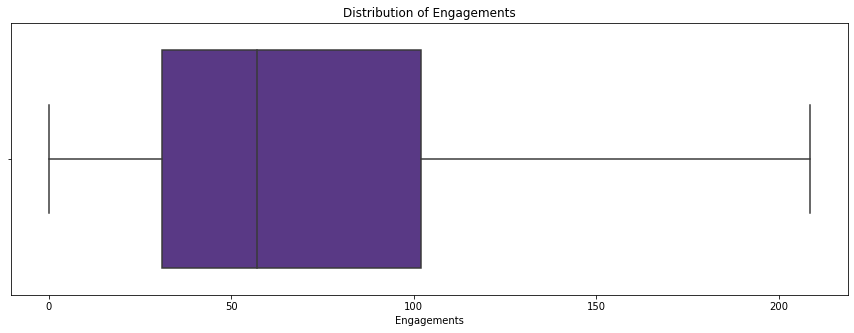

Total Outliers in Likes: 0
Percentage of outliers in Likes: 0.0 %


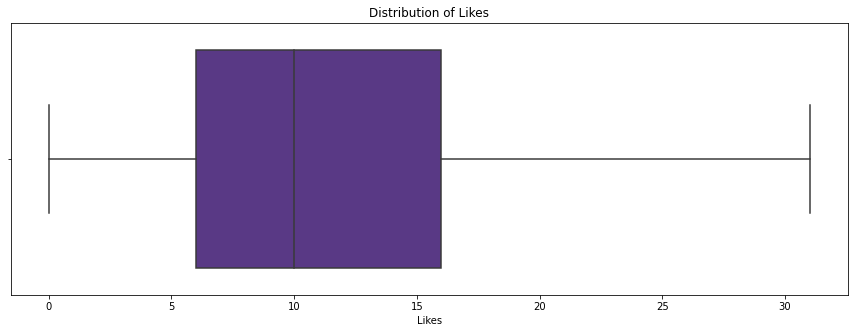

Total Outliers in Comments: 0
Percentage of outliers in Comments: 0.0 %


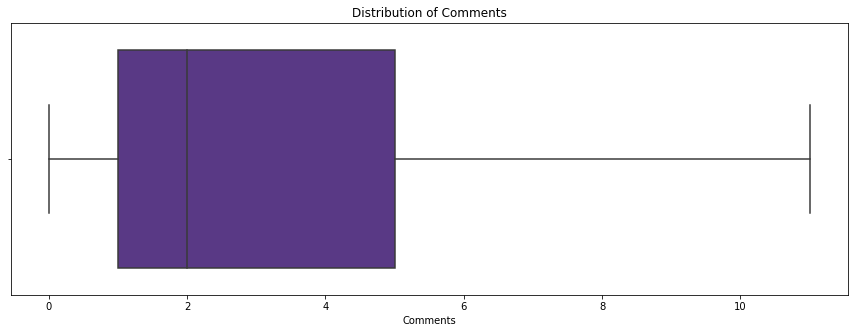

Total Outliers in Other Post Clicks: 0
Percentage of outliers in Other Post Clicks: 0.0 %


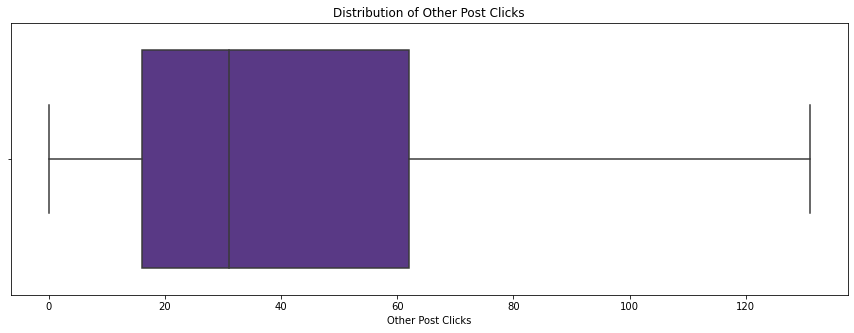

Total Outliers in Post Clicks (All): 0
Percentage of outliers in Post Clicks (All): 0.0 %


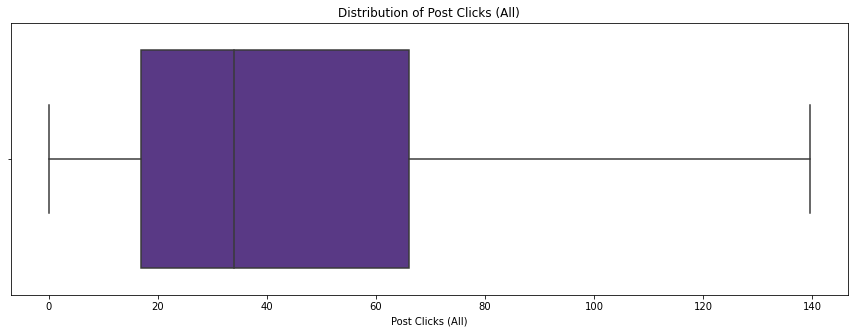

Total Outliers in Post Hashtag Clicks: 0
Percentage of outliers in Post Hashtag Clicks: 0.0 %


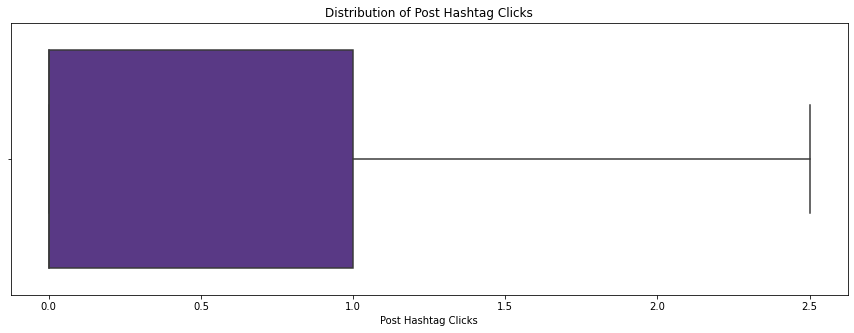

Total Outliers in Post Detail Expand Clicks: 0
Percentage of outliers in Post Detail Expand Clicks: 0.0 %


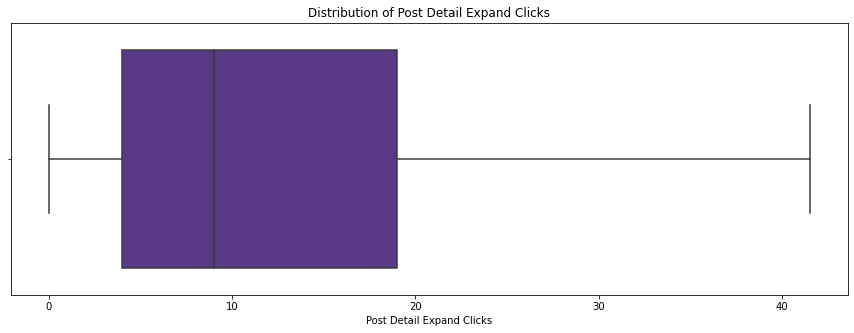

Total Outliers in Profile Clicks: 0
Percentage of outliers in Profile Clicks: 0.0 %


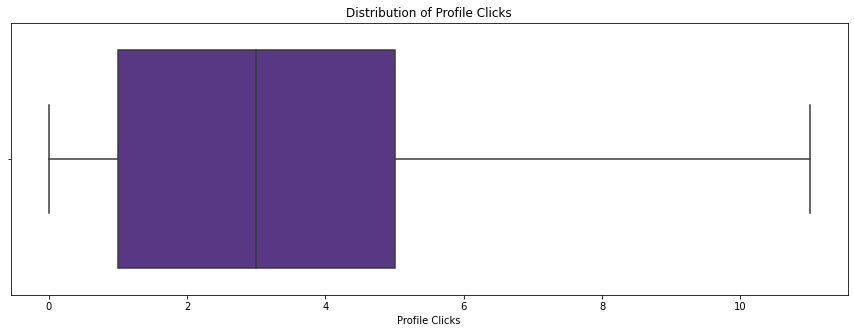

Total Outliers in Video Views: 0
Percentage of outliers in Video Views: 0.0 %


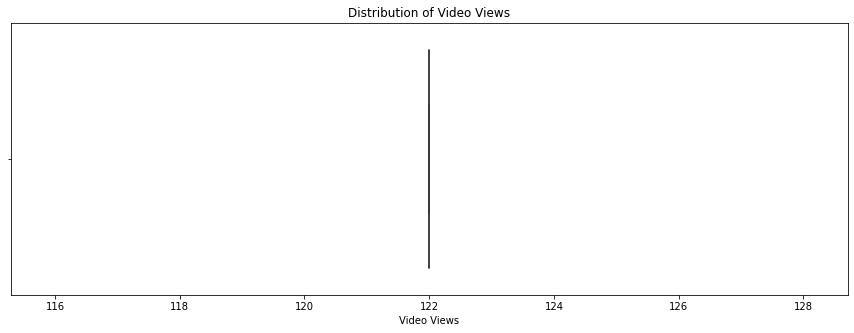

Total Outliers in Media Views: 0
Percentage of outliers in Media Views: 0.0 %


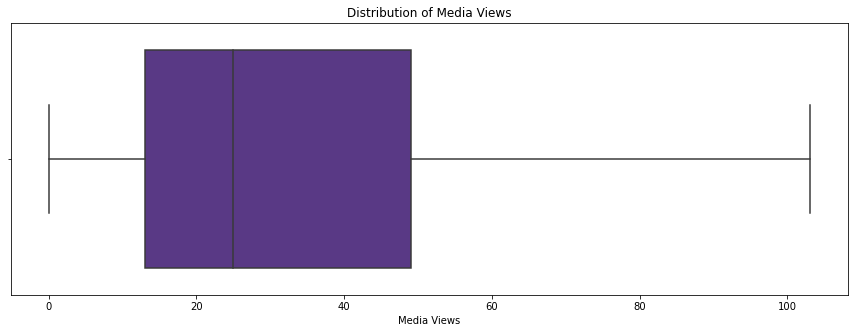

In [29]:
omit = ['Shares','Click-Through Rate', 'Post Link Clicks', 'Other Engagements','App Engagements','App Install Attempts',\
       'App Opens','Follows from Post','Unfollows from Post']
# Impute Outliers
for col in twitter_new.columns:
    if twitter_new[col].dtype == int or twitter_new[col].dtype == float:
        if col not in omit:
            q3 = twitter_new[col].quantile(0.75)
            q1 = twitter_new[col].quantile(0.25)

            iqr = q3 - q1

            low = q1 - 1.5 * iqr
            high = q3 + 1.5 * iqr

            twitter_new[col] = np.where(twitter_new[col] < low, low,
                               np.where(twitter_new[col] > high, high, twitter_new[col]))

            outliers = twitter_new[(twitter_new[col]<low)|(twitter_new[col]>high)]
            print(f'Total Outliers in {col}:', len(outliers))
            outlier_perc = (len(outliers)/len(twitter_new)) * 100

            print(f"Percentage of outliers in {col}:", outlier_perc, "%")
            plt.figure(figsize=(15,5))
            sns.boxplot(x=twitter_new[col])
            plt.title(f'Distribution of {col}')
            plt.show()

The data has now ready for use for further data exploration.

### Data Exploration

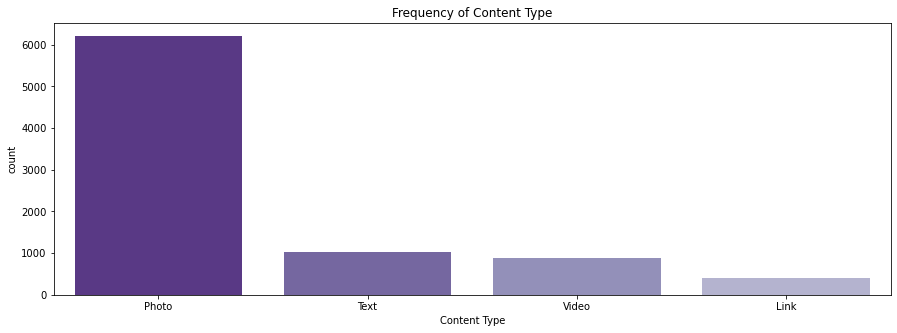

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(data=twitter_new, x='Content Type')
plt.title('Frequency of Content Type')
plt.show()

Photos are the most frequently posted content type on Twitter, while, links are the least posted content type

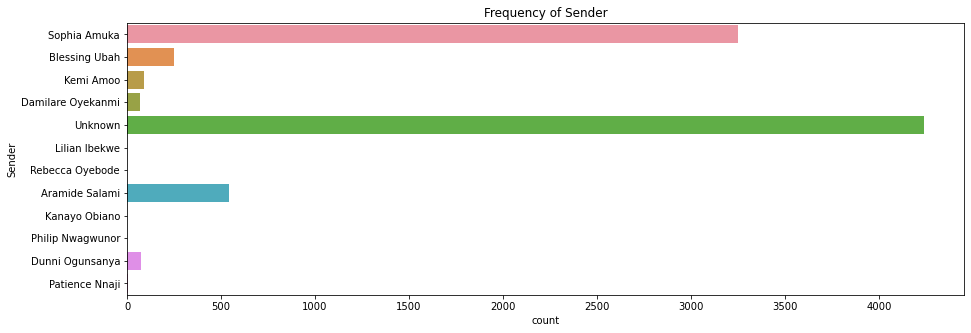

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(data=twitter_new, y='Sent by')
plt.title('Frequency of Sender')
plt.ylabel('Sender')
plt.show()

only 2 known senders have posted more than 500 contents, many of the content sender failed to record their names.

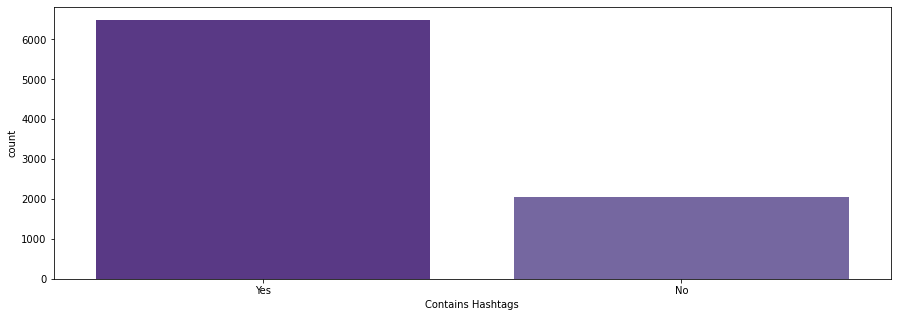

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(data= twitter_new, x = 'Contains Hashtags')
plt.show()

Majority of the post/captions contains hashtags

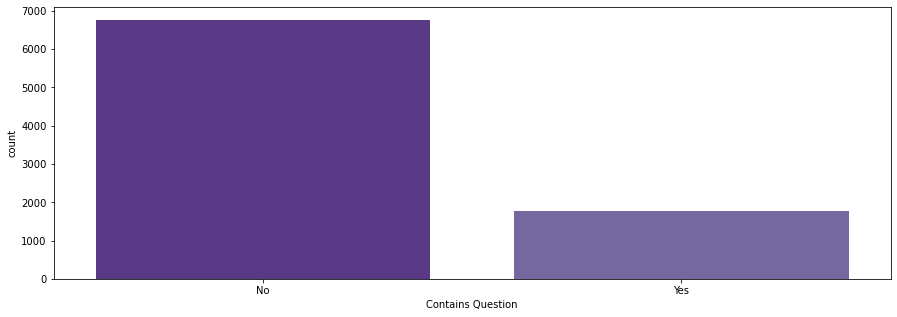

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(data= twitter_new, x = 'Contains Question')
plt.show()

Fewer posts/captions contains questions.

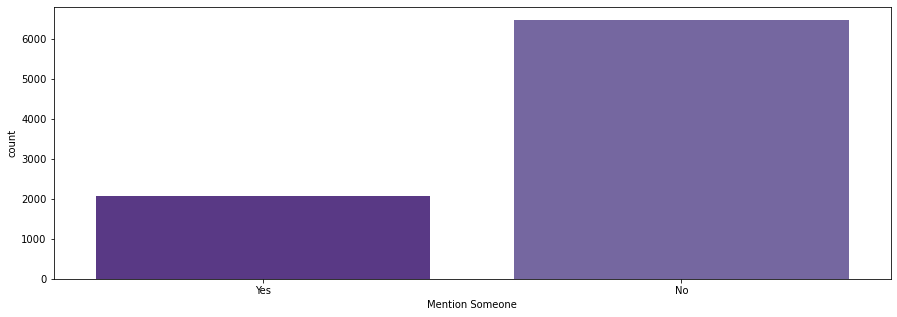

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(data= twitter_new, x = 'Mention Someone')
plt.show()

Fewer posts/captions involved mentioning another account

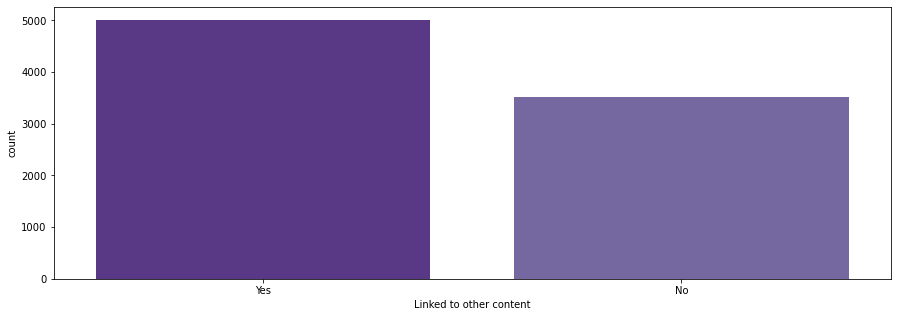

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(data= twitter_new, x = 'Linked to other content')
plt.show()

Most posts/captions were linked to other contents

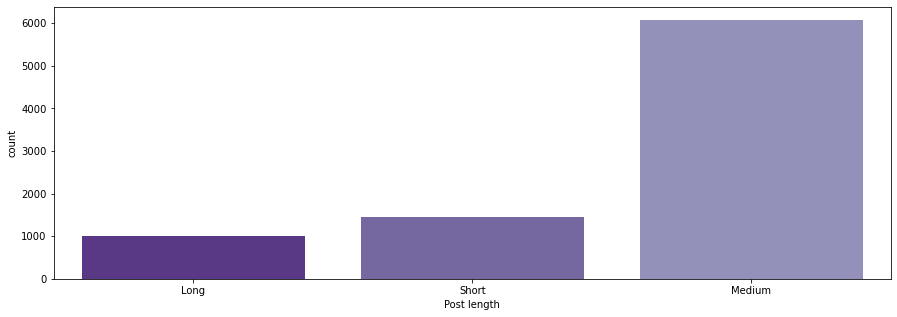

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(data= twitter_new, x = 'Post length')
plt.show()

Majority of the post are medium length, followed by short posts. Long post are the least posted type

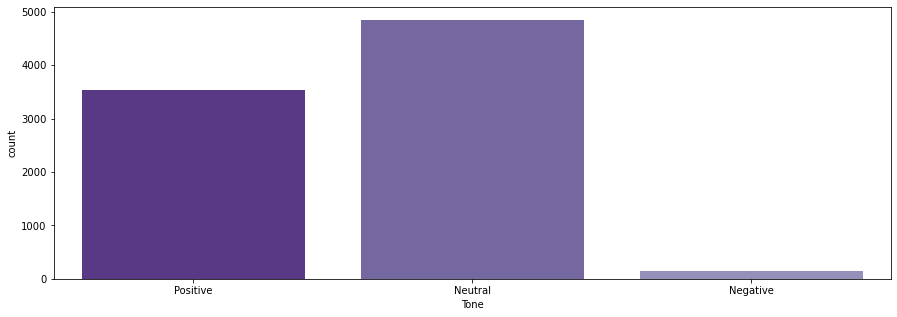

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(data= twitter_new, x = 'Tone')
plt.show()

Most are the posts/captions sounded Neutral, followed positive post and Negative post being the least posted Tone Type.

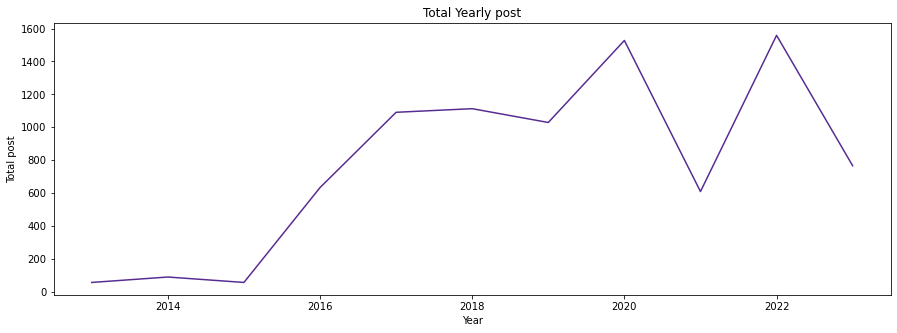

In [38]:
gr = twitter_new.groupby(twitter_new.Date.dt.year)['Post'].count()
plt.figure(figsize=(15,5))
gr.plot()
plt.xlabel('Year')
plt.ylabel('Total post')
plt.title('Total Yearly post')
plt.show()

2020 and 2022 recorded the most number of tweets tweeted by the company.

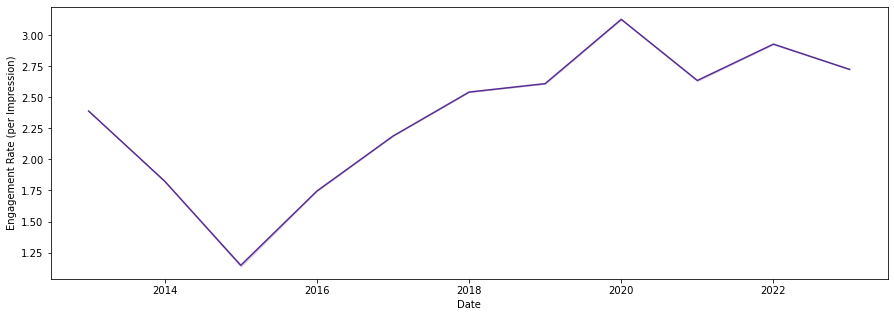

In [39]:
plt.figure(figsize=(15,5))
sns.lineplot(data=twitter_new, x = twitter_new.Date.dt.year, y = 'Engagement Rate (per Impression)', ci=False)
plt.show()

Engagements for the company's posts peaked in 2020, this peak can be attributed to Impressions also reaching its peak in the same year. Engagement rate (per impression) also reached its highest in 2020 and 2022 which could also be as a result of the number of posts made in those year peaking.

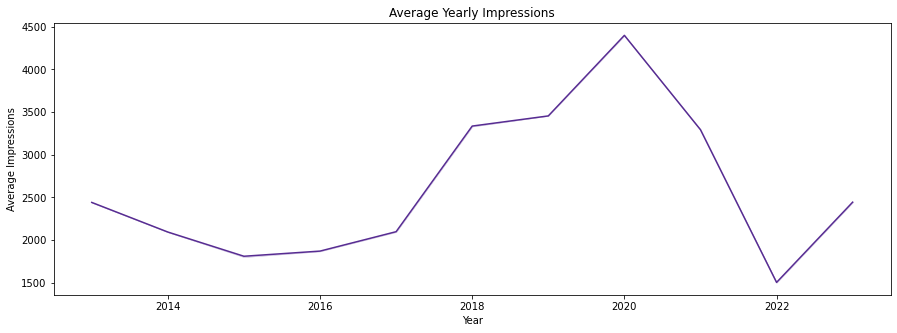

In [40]:
plt.figure(figsize=(15,5))
sns.lineplot(data=twitter_new, x = twitter_new.Date.dt.year, y = 'Impressions', ci=False)
plt.xlabel('Year')
plt.ylabel('Average Impressions')
plt.title('Average Yearly Impressions')
plt.show()

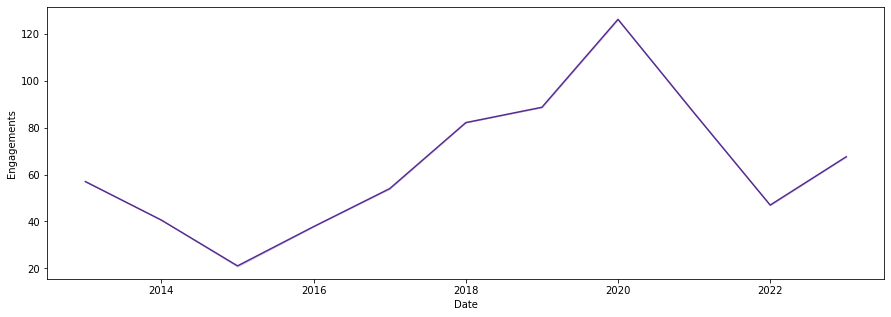

In [41]:
plt.figure(figsize=(15,5))
sns.lineplot(data=twitter_new, x = twitter_new.Date.dt.year, y = 'Engagements', ci=False)
plt.show()

Impression and Engagements has a strong positive correlation implying that as immpression increases, so does engagements. Note this does not imply causation. This is also evidenced by a correlation coefficient of 0.7 and both line graph above indicating that impression and engagements peaked in 2020.

In [42]:
#twitter_new['Time of Day'] = np.where(twitter_new['Date'].dt. )

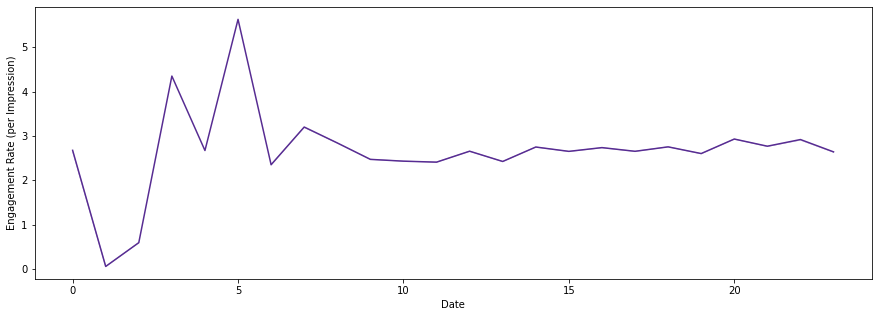

In [43]:
plt.figure(figsize=(15,5))
sns.lineplot(data=twitter_new, x = twitter_new.Date.dt.hour, y = 'Engagement Rate (per Impression)', ci=False)
plt.show()


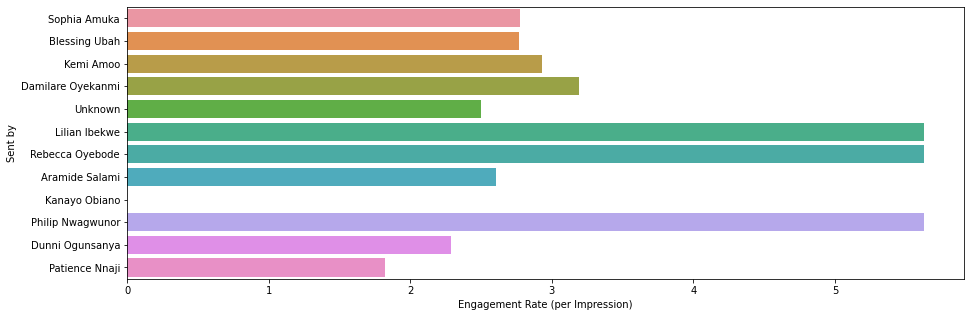

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(data=twitter_new, y = 'Sent by', x = 'Engagement Rate (per Impression)', ci=False)
plt.show()

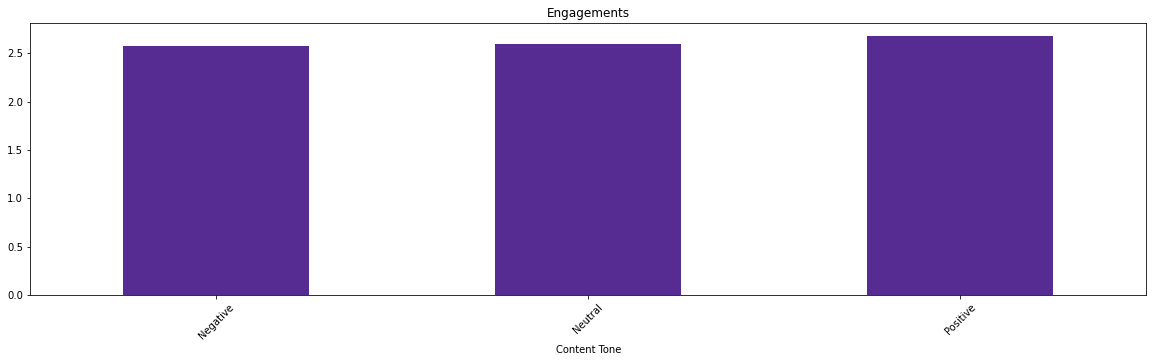

In [45]:
grouped = twitter_new.groupby(['Tone'])['Engagement Rate (per Impression)'].mean()
plt.figure(figsize=(20,5))
grouped.plot(kind='bar')
plt.xlabel('Content Tone')
plt.xticks(rotation = 45)
plt.title('Engagements')
plt.show()

Post/Captions that sounded positive generates a higher engagement rate, while, negative generates the least

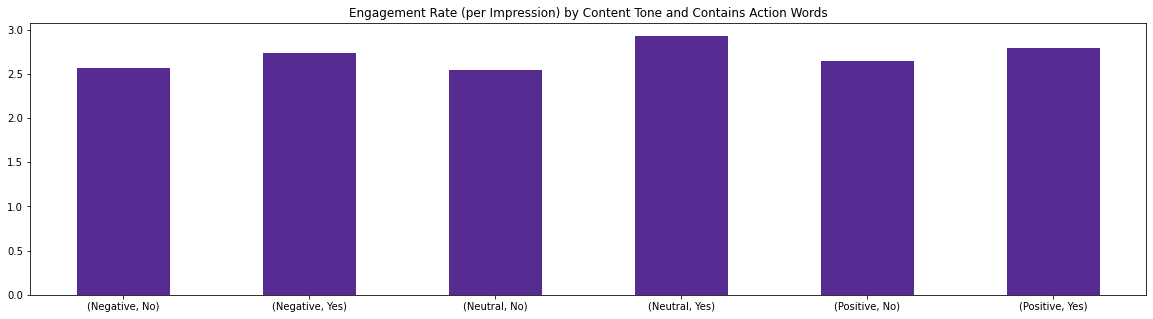

In [46]:
grouped = twitter_new.groupby(['Tone', 'Contains Action Words'])['Engagement Rate (per Impression)'].mean()
plt.figure(figsize=(20,5))
grouped.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.title('Engagement Rate (per Impression) by Content Tone and Contains Action Words')
plt.show()

irrespective of the tone of the post/caption, using action words improves the Engagement Rate (per impression)

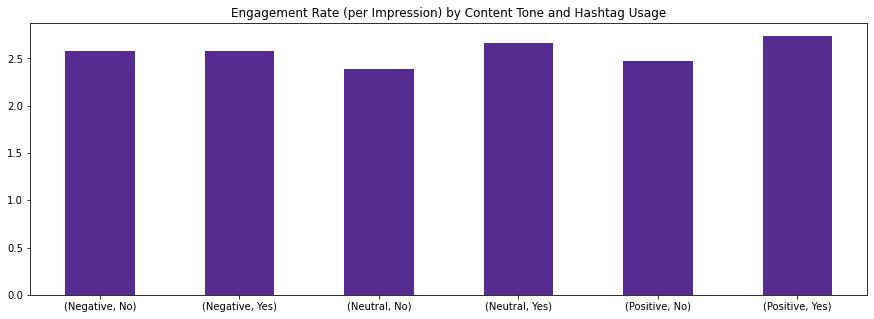

In [47]:
plt.figure(figsize=(15,5))
gr = twitter_new.groupby(['Tone','Contains Hashtags'])['Engagement Rate (per Impression)'].mean()
gr.plot(kind='bar')
plt.title('Engagement Rate (per Impression) by Content Tone and Hashtag Usage')
plt.xlabel('')
plt.xticks(rotation = 0) 
plt.show()

For all post/caption tone type, using hashtag generates a higher engagement rate

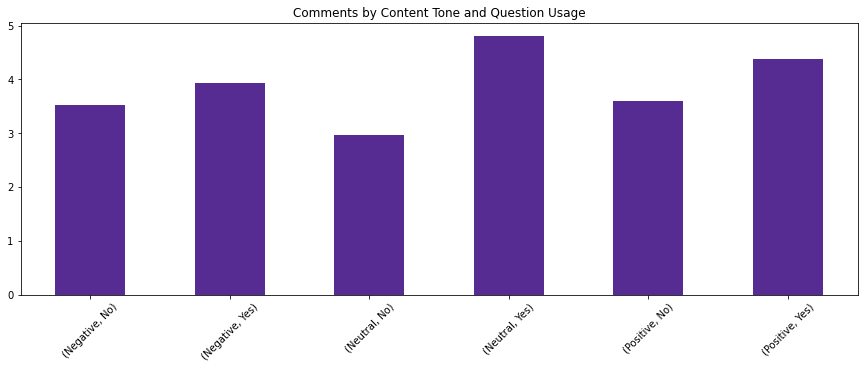

In [48]:
plt.figure(figsize=(15,5))
gr = twitter_new.groupby(['Tone','Contains Question'])['Comments'].mean()
gr.plot(kind='bar')
plt.title('Comments by Content Tone and Question Usage')
plt.xlabel('')
plt.xticks(rotation = 45)
plt.show()

Using questions generates more comments for all post/caption tone type

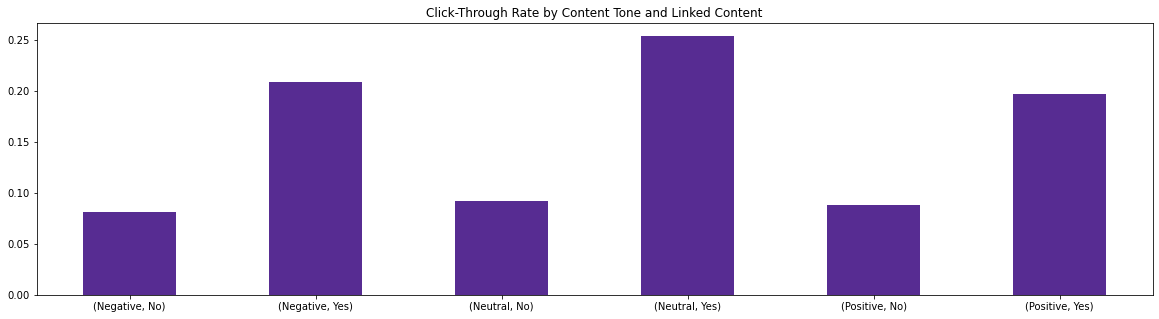

In [49]:
grouped = twitter_new.groupby(['Tone', 'Linked to other content'])['Click-Through Rate'].mean()
plt.figure(figsize=(20,5))
grouped.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.title('Click-Through Rate by Content Tone and Linked Content')
plt.show()

Also, Linking the post to other content helps generate a higher CTR for all post/caption tone.

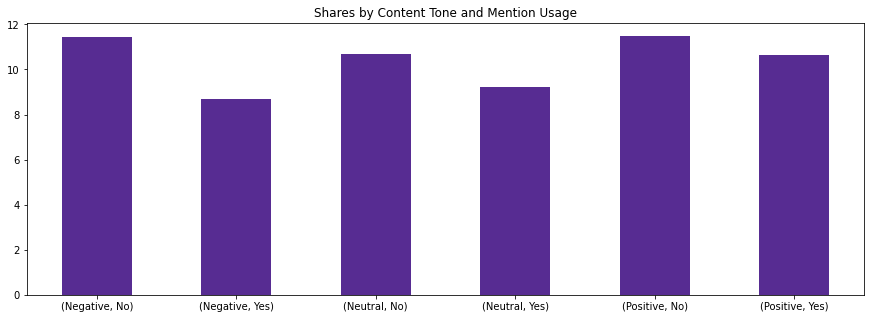

In [50]:
plt.figure(figsize=(15,5))
gr = twitter_new.groupby(['Tone','Mention Someone'])['Shares'].mean()
gr.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.title('Shares by Content Tone and Mention Usage')
plt.show()

For all post type, mentioning another account is not important for improving the virality of a post, as not mentioning any account in a post/caption generated more shares than mentioning any account.

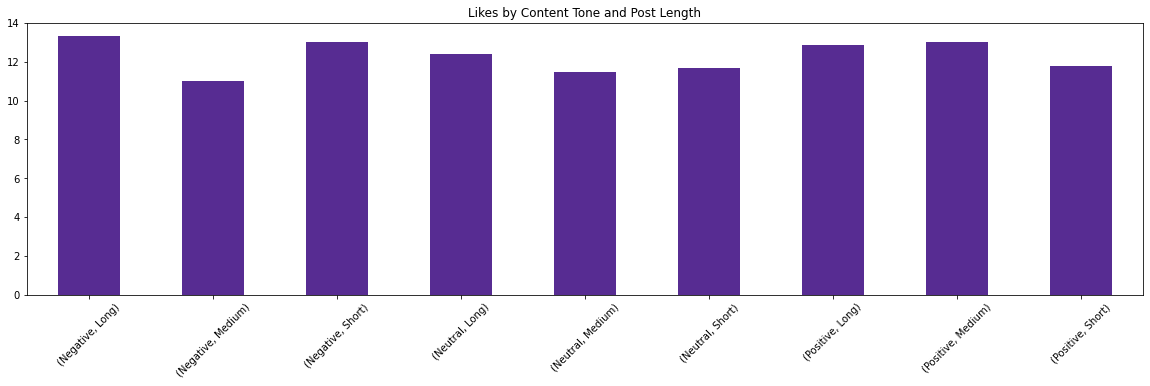

In [51]:
grouped = twitter_new.groupby(['Tone', 'Post length'])['Likes'].mean()
plt.figure(figsize=(20,5))
grouped.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation = 45)
plt.title('Likes by Content Tone and Post Length')
plt.show()

Surprisingly, Lengthy post (> 250 characters) tends to be generating higher likes than short and  medium length post for all tone type

#### How did each content type performed when combined with various posts features?

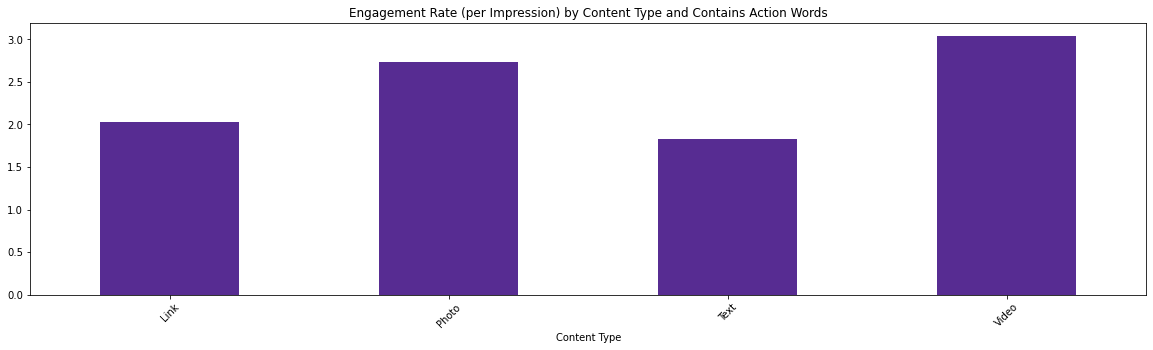

In [52]:
grouped = twitter_new.groupby(['Content Type'])['Engagement Rate (per Impression)'].mean()
plt.figure(figsize=(20,5))
grouped.plot(kind='bar')
plt.xlabel('Content Type')
plt.xticks(rotation = 45)
plt.title('Engagement Rate (per Impression) by Content Type and Contains Action Words')
plt.show()

Videos are generating the most engagements rate per impression while text are generating the least.

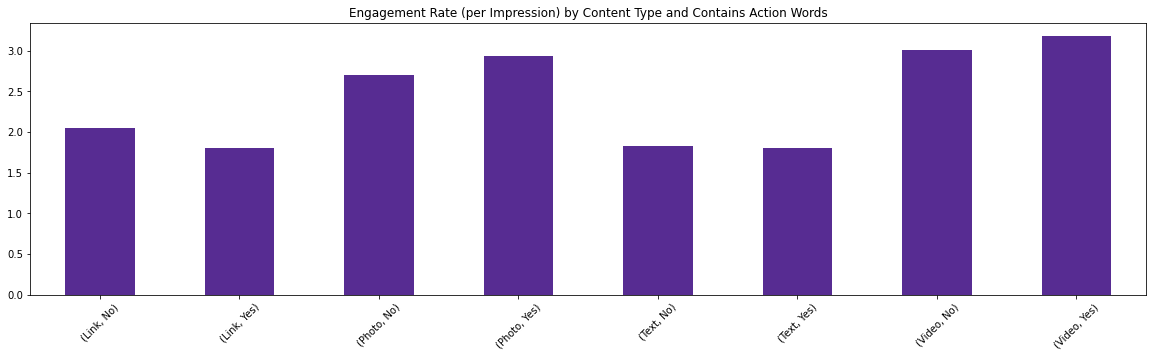

In [53]:
grouped = twitter_new.groupby(['Content Type', 'Contains Action Words'])['Engagement Rate (per Impression)'].mean()
plt.figure(figsize=(20,5))
grouped.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation = 45)
plt.title('Engagement Rate (per Impression) by Content Type and Contains Action Words')
plt.show()

The above column chart shows that combining content type with action words such as like, comment, share, follow generate a higher engagement rate than content types without action words in their captions or posts.

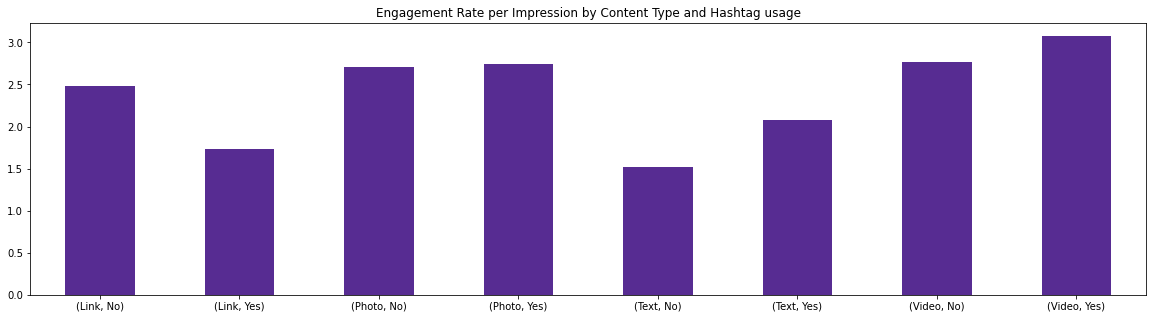

In [54]:
grouped = twitter_new.groupby(['Content Type', 'Contains Hashtags'])['Engagement Rate (per Impression)'].mean()
plt.figure(figsize=(20,5))
grouped.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.title('Engagement Rate per Impression by Content Type and Hashtag usage')
plt.show()

AS shown in the graph above, except for link content type, using hashtags in the captions generate a higher Engagement Rate (per impression) for each content type.

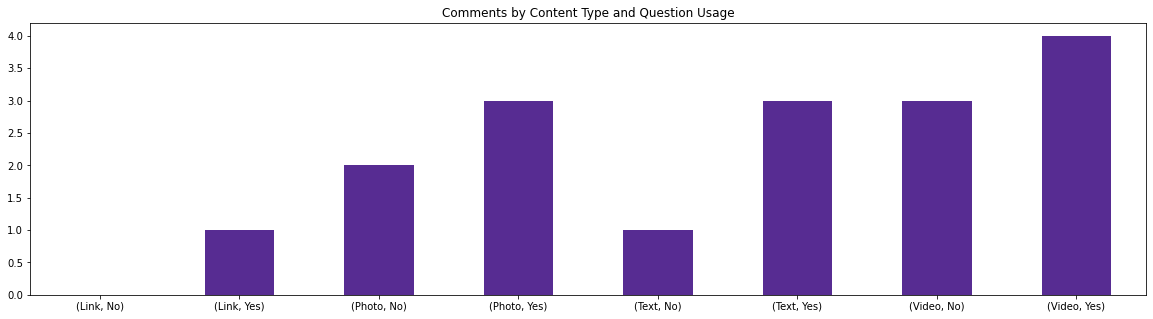

In [55]:
grouped = twitter_new.groupby(['Content Type', 'Contains Question'])['Comments'].median()
plt.figure(figsize=(20,5))
grouped.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.title('Comments by Content Type and Question Usage')
plt.show()

Irrespective of the content type, Asking questions in than caption generates more comments than captions without comments.

Now, lets try to answer the question, whenever i want to direct my audience to other contents, which content type should i attach my other links to, to generate a high CTR.

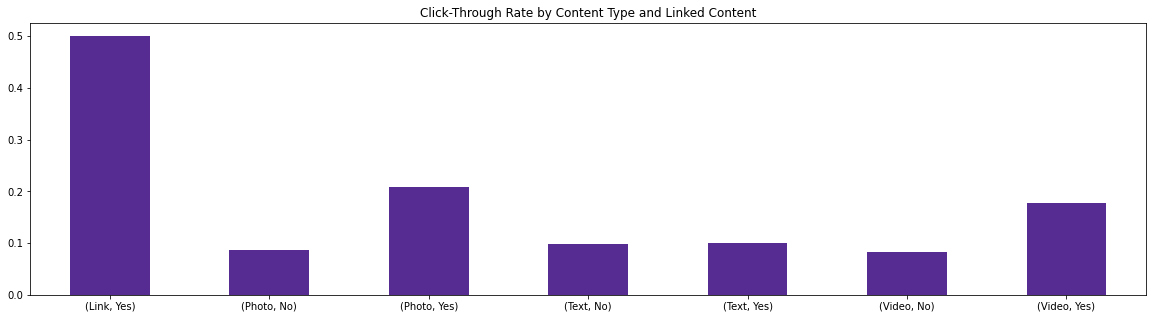

In [56]:
grouped = twitter_new.groupby(['Content Type', 'Linked to other content'])['Click-Through Rate'].mean()
plt.figure(figsize=(20,5))
grouped.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.title('Click-Through Rate by Content Type and Linked Content')
plt.show()

Photos!!! link content do not need to attached to other content type in order to generate a higher CTR. however, when trying to combine links with other content type, it is better to combine them with Photos as they generate a higher CTR than combining with other content types.

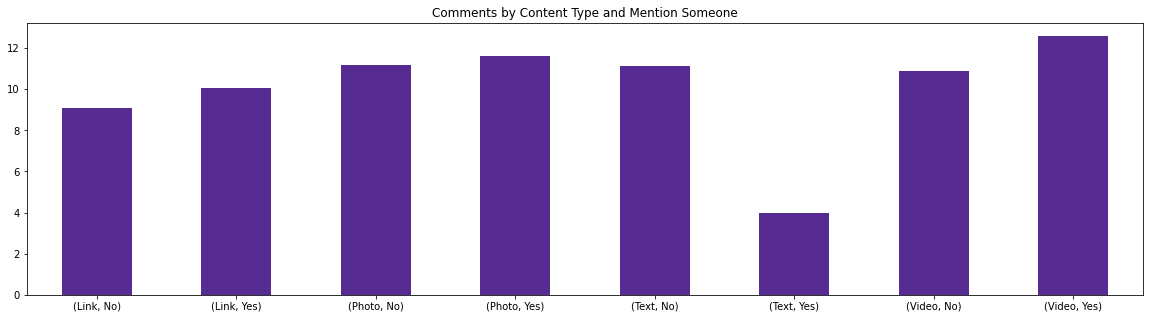

In [57]:
grouped = twitter_new.groupby(['Content Type', 'Mention Someone'])['Shares'].mean()
plt.figure(figsize=(20,5))
grouped.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation = 0)
plt.title('Shares by Content Type and Mention Someone')
plt.show()

Except for Text content type, Mentioning someone improves the chance of the post going viral, as it will gather more Shares/Retweet/Repost than not mentioning someone in the post.

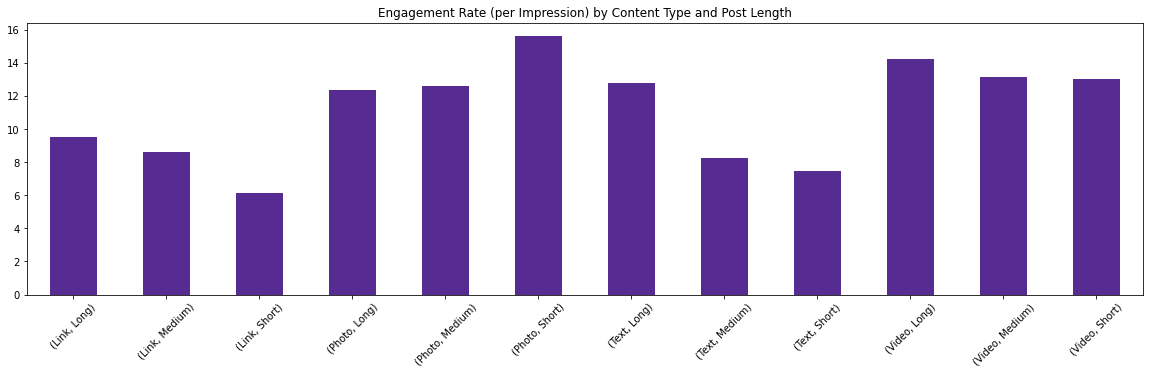

In [58]:
grouped = twitter_new.groupby(['Content Type', 'Post length'])['Likes'].mean()
plt.figure(figsize=(20,5))
grouped.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation = 45)
plt.title('Engagement Rate (per Impression) by Content Type and Post Length')
plt.show()

Except for Photo contents where short captions/posts results in higher likes, making long captions/post actually increases the chances of the posts being liked more times

# Hypothesis Testing

In [59]:
stat_data = twitter_new.iloc[:,-7:]

In [60]:
labels = twitter_new['Tone'].unique()
groups = [twitter_new['Engagement Rate (per Impression)'][twitter_new['Tone'] == label] for label in labels]
anova_result = stats.f_oneway(*groups)
print(f"ANOVA p-value between Tone and Engagement Rate (per Impression): {round(anova_result.pvalue,2)}")

ANOVA p-value between Tone and Engagement Rate (per Impression): 0.02


With a p-value of 0.02, it can be concluded that there are significant differences in the Engagement Rate generated by Content Tones

In [61]:
stat_data['Engagement Rate'] = twitter_new['Engagement Rate (per Impression)']
stat_data.head()

,Contains Question,Mention Someone,Contains Hashtags,Linked to other content,Post length,Contains Action Words,Tone,Engagement Rate
0,No,Yes,Yes,Yes,Long,Yes,Positive,3.60
1,Yes,No,Yes,No,Short,Yes,Neutral,1.76
2,No,No,Yes,Yes,Medium,No,Positive,4.24
3,No,No,Yes,Yes,Short,No,Neutral,3.40
4,No,Yes,Yes,Yes,Medium,No,Positive,1.52


In [62]:
data_x = pd.get_dummies(stat_data[['Contains Question','Mention Someone','Contains Hashtags','Linked to other content','Post length','Contains Action Words','Tone']], drop_first=True)
x = data_x.values
y = stat_data['Engagement Rate'].values

In [63]:
lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.0656449569940748

In [64]:
feat_imp = lr.coef_

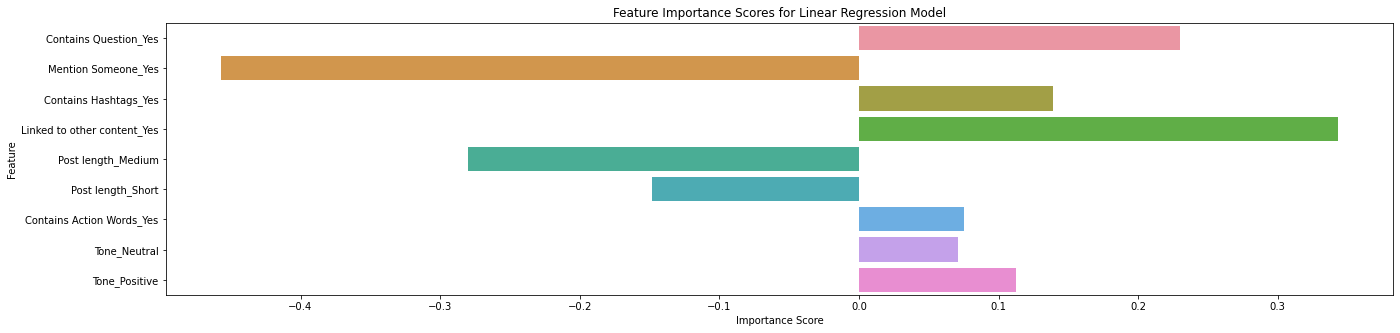

In [65]:
plt.figure(figsize=(22,5))
sns.barplot(y=data_x.columns, x=feat_imp)
#plt.xticks(range(len(feat_imp)), data_x.columns[:-1], rotation=90)
plt.ylabel('Feature')
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores for Linear Regression Model')
plt.show()

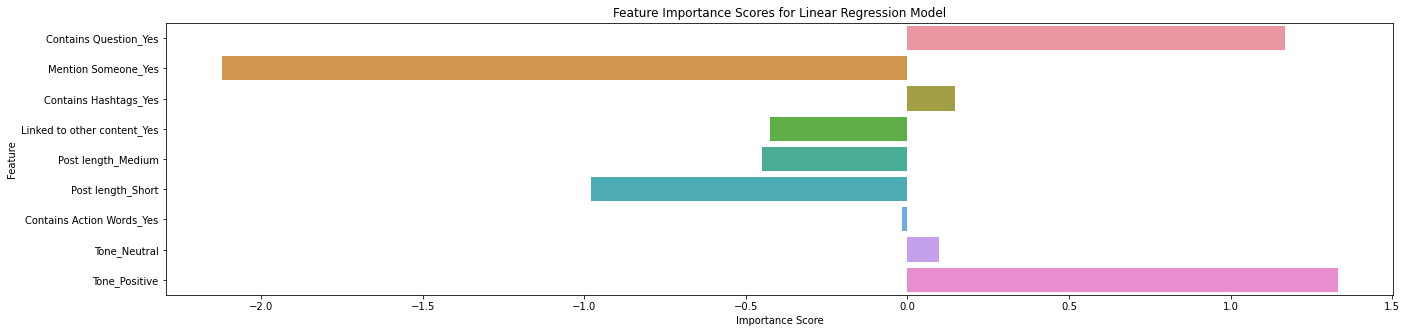

In [66]:
y = twitter_new['Likes']

lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

feat_imp = lr.coef_
plt.figure(figsize=(22,5))
sns.barplot(y=data_x.columns, x=feat_imp)
plt.ylabel('Feature')
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores for Linear Regression Model')
plt.show()

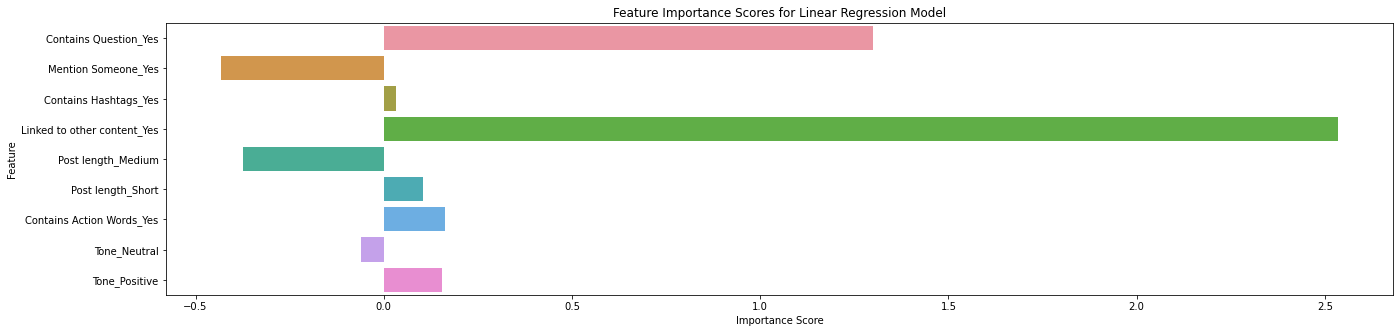

In [67]:
y = twitter_new['Comments']

lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

feat_imp = lr.coef_
plt.figure(figsize=(22,5))
sns.barplot(y=data_x.columns, x=feat_imp)
plt.ylabel('Feature')
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores for Linear Regression Model')
plt.show()

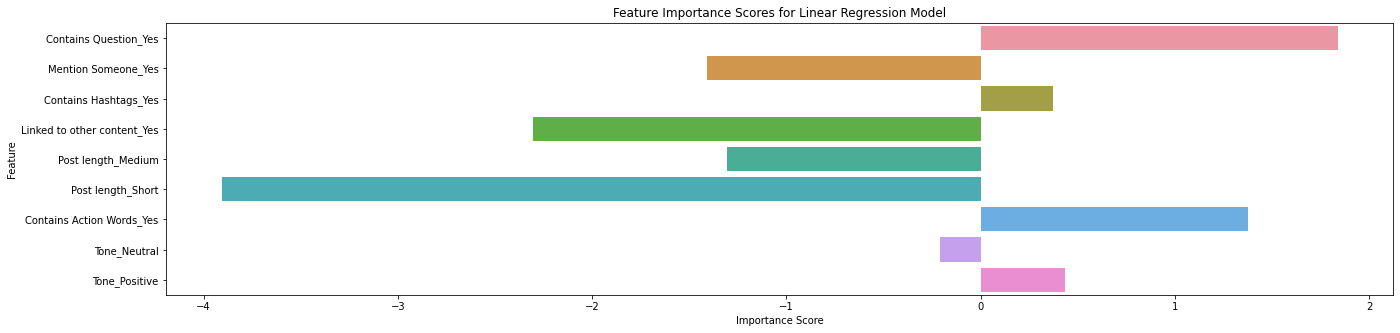

In [68]:
y = twitter_new['Shares']

lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

feat_imp = lr.coef_
plt.figure(figsize=(22,5))
sns.barplot(y=data_x.columns, x=feat_imp)
plt.ylabel('Feature')
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores for Linear Regression Model')
plt.show()

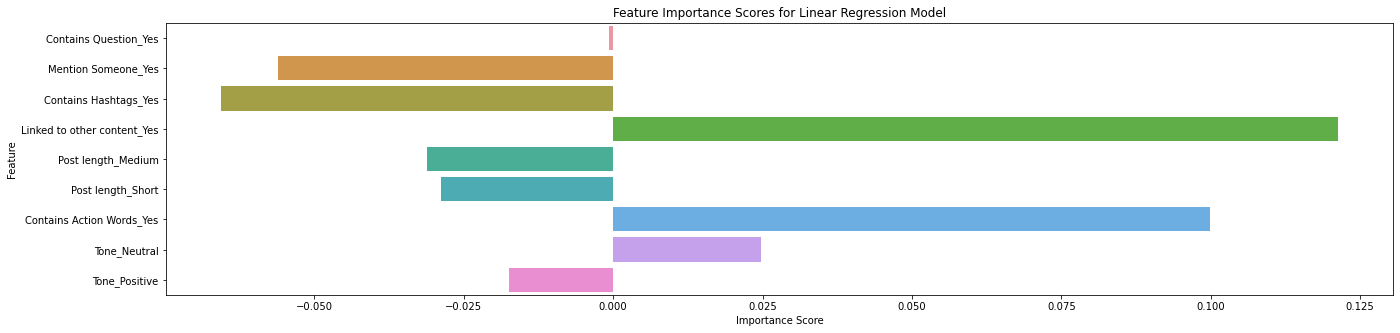

In [69]:
y = twitter_new['Click-Through Rate']

lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

feat_imp = lr.coef_
plt.figure(figsize=(22,5))
sns.barplot(y=data_x.columns, x=feat_imp)
plt.ylabel('Feature')
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores for Linear Regression Model')
plt.show()

In [70]:
labels = twitter_new['Content Type'].unique()
groups = [twitter_new['Engagement Rate (per Impression)'][twitter_new['Content Type'] == label] for label in labels]
anova_result = stats.f_oneway(*groups)
print(f"ANOVA p-value between Content Type and Engagement Rate (per Impression): {round(anova_result.pvalue,2)}")

ANOVA p-value between Content Type and Engagement Rate (per Impression): 0.0


In [71]:
grouped = twitter_new.groupby(['Tone'])['Engagement Rate (per Impression)'].mean()
grouped

Tone
Negative    2.575329
Neutral     2.593252
Positive    2.676120
Name: Engagement Rate (per Impression), dtype: float64

# CONCLUSIONS AND RECOMMENDATIONS

#### Conclusion
- The engagement rate (per impression) varies according to the tone of the post: Negative tone has 2.57, Neutral Tone has 2.59, and Positive Tone has 2.67. A statistical test with a p-value of 0.02 shows that this difference is not due to chance. Therefore, we can conclude that Positive Tone leads to more engagement per impression than other tones.

- Using linear regression to measure the feature importance of different aspects of a post. it can be concluded that the most important features for each outcome are:

 - - Engagement rate (per impression): Linking to other contents or posts, asking questions, and using hashtags.
 - - Likes: Using positive tone and asking questions.
 - - Comments: Linking to other contents and asking questions.
 - - Virality: Asking questions and using action words.
 - - Click-Through rate: Linking to other contents, using action words, and using a neutral tone.



#### Recommendation

Based on the above conclusions, the following are recommended.
- To increase the engagement rate of twitter posts, use a Positive Tone in captions. This will make the posts more appealing and attractive to the audience, and encourage them to interact with the content.
- Link posts to relevant or interesting contents or posts, ask questions that invite the audience to share their opinions or experiences, and use hashtags that are popular or related to your topic to boost engagement rate per impression. 
- Use positive tone and ask questions that show your interest in your audience or your topic to generate more likes. 
- Link posts to other contents or posts that spark a discussion or a debate, and ask questions that challenge the audience or provoke their curiosity in order to generate more comments
- To make post go viral, ask questions that are catchy, controversial, or surprising, and use action words that urge the audience to act or share the post.
- For click-through rate to improve, Link posts to other contents that are informative, useful, or entertaining, use action words that create a sense of urgency, curiosity, or excitement, and use a neutral tone that is clear, concise, and professional.